![Capture_titulo3.jpg](Capture_titulo.jpg)

![Capture_auto.jpg](Capture_auto.jpg)

<h3 style="color:MediumPurple;"> Contexto Empresarial: </h3>


<font style="color:DarkBlue;" face="Trebuchet MS"> Somos una empresa joven dedicada al negocio de Consultoria Automotriz. Nos apasiona lo que hacemos y queremos brindar la mejor experiencia a nuestros clientes. Creemos que el futuro es para aquellos que piensan más allá de los límites del presente y descubren nuevas fuentes de valor. Queremos hacer los cambios que marcan la diferencia. Tenemos un sólido objetivo, el cual se basa en ofrecer asesoraría sobre las diferentes conecciones que regulan el precio de un automovil. Es entre estos aspectos, que comienza la comprensión de las variables del campo, su profundidad y posibilidades; permitiendonos asi brindar un modelo de negocio exitoso y sustentable. </font>


<h3 style="color:MediumPurple;"> Data Science (Creando valor): </h3>


<font style="color:DarkBlue;" face="Trebuchet MS"> En el mundo de hoy, los negocios y la tecnología cambian rápidamente, presentando oportunidades inigualables para un crecimiento rápido y transformador.</font>

<font style="color:DarkBlue;" face="Trebuchet MS">Nuestra área de Data Science puede ayudarlo a aprovechar estas oportunidades; para descubrir los secretos que existen detrás de la información.</font>

<font style="color:DarkBlue;" face="Trebuchet MS">Podemos trabajar junto a usted en cualquier instancia del proceso para convertir información y datos complejos en inteligencia de negocios.</font>

<font style="color:DarkBlue;" face="Trebuchet MS">Podemos ofrecer el asesoramiento preciso y directo, en el momento adecuado, para que puedan tomar la mejor decisión.</font>


<h3 style="color:MediumPurple;"> Nuestras Oficinas: </h3>

<img src="Oficinas.JPG" alt="Drawing" style="width: 250px;"/>

<h3 style="color:MediumPurple;"> Nuestra Ubicacion: </h3>

<font style="color:DarkBlue;" face="Trebuchet MS"> _Podra interactuar con el mapa a fin de facilitarle nuestra ubicacion: </font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import urllib
import folium
from folium.plugins import MiniMap
from folium.plugins import FloatImage
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.graph_objs as go
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from wordcloud import WordCloud
from plotly.subplots import make_subplots

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor



#latitud y Longitud de nuestra ubicacion
#-34.598594024160775, -58.366549

#Haciendo click en el pin informa "Nuestra Ubicacion"
popuptext = "<b>Nuestra Ubicacion</b>"

direccion = folium.Map(location = [-34.598594024160775, -58.366549], zoom_start = 10)

folium.Marker(location = [-34.598594024160775, -58.366549], popup = popuptext).add_to(direccion)

folium.Circle(location = [-34.598594024160775, -58.366549], color = "purple", fill_color = "red", 
             radius = 40, weight = 4, fill_opacity = 0.5).add_to(direccion)

#Estilo de mapa "stamenterrain"
folium.TileLayer("stamenterrain").add_to(direccion)

minimap = MiniMap()

direccion.add_child(minimap)

<h3 style="color:MediumPurple;"> Contexto Comercial: </h3>


<font style="color:DarkBlue;" face="Trebuchet MS"> _Una empresa automovilística china, aspira a entrar en el mercado estadounidense estableciendo allí su unidad de fabricación y produciendo automóviles localmente para competir con sus contrapartes estadounidenses y europeas. </font>

<font style="color:DarkBlue;" face="Trebuchet MS"> Nos han contratado para comprender los factores de los que depende el precio de los automóviles. Específicamente, quieren comprender los factores que afectan el precio de los automóviles en el mercado estadounidense. </font>





<h3 style="color:MediumPurple;"> Descripción de la temática de los datos: </h3>


<font style="color:DarkBlue;" face="Trebuchet MS"> _Con base en varias encuestas de mercado, hemos recopilado un gran conjunto de datos de diferentes tipos de automóviles en el mercado estadounidense. Los mismos estan disponibles en:</font>

https://www.kaggle.com/


<h3 style="color:MediumPurple;"> Acerca del conjunto de datos: </h3>


<font style="color:DarkBlue;" face="Trebuchet MS"> _Consta de 26 columnas por 205 filas </font>


<h3 style="color:MediumPurple;"> Hipotesis: </h3>


<font style="color:DarkBlue;" face="Trebuchet MS"> _Tendremos por objetivo plantear un modelo supervisado a fin de arribar a un analisis predictivo. Siendo nuestro fin ultimo validar la hipotesis: Se puede saber cual sera el precio de un automovil a partir de valores ya conocidos y como las diferentes variables influyen en su total?.
    
<font style="color:DarkBlue;" face="Trebuchet MS"> En consecuencia, nuestro cliente podra manipular el diseño de los automóviles, la estrategia comercial, etc. para cumplir con ciertos niveles de precios. </font>

<center><h1 style="color:DarkOrchid;"> EDA (Exploratory Data Analysis): </h1></center>

<h4 style="color:MediumPurple;">Iniciaremos nuestro proceso geo-referenciando el contexto de nuestro analisis: </h4>

<font style="color:DarkBlue;" face="Trebuchet MS">_Una empresa china contrato nuestros servicios, en Argentina, para entender los factores que regulan el precio de los automoviles en el mercado estadounidense</font>

In [2]:
df_c = pd.DataFrame()

df_c['Pais'] = ['Argentina', 'China', 'United States']

df_c['ISO'] = ['ARG', 'CHN', 'USA']

df_c['Sede'] = ['Oficinas', 'Cliente', 'Mercado Estudio']


fig = px.choropleth(df_c, locations="ISO", color="Pais", hover_name="Pais",
                   #color_discrete_sequence=px.colors.sequential.PuBu (color en forma automatica)
                   #'#0d0887', '#46039f', '#7201a8' (color en forma manual)
                   color_discrete_sequence=['#0d0887', '#46039f', '#7201a8'],
                   hover_data={"Sede":True,
                               'Pais':False, 'ISO':False}# remueve Pais e ISO de hover data
                   )


layout = go.Layout(
    title=go.layout.Title(
        text="Paises involucrados (deslice el mouse sobre el pais)",
        x=0.5), font=dict(size=12),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30))

fig.update_layout(layout)

fig.show()

##### _Descripcion general del DataSet

###### Columnas:

- [x] **car_ID:** numeracion secuencial de los autos
- [x] **CarName:** marca/modelo
- [x] **fueltype:** tipo de combustible
- [x] **aspiration:** tipo de aspiracion (standard/turbo)
- [x] **doornumber:** numero de puertas
- [x] **carbody:** tipo de auto
- [x] **drivewheel:** traccion (delantera/trasera/4x4) 
- [x] **enginelocation:** ubicacion del motor
- [x] **wheelbase:** distancia entre ejes
- [x] **carlength:** largo del auto
- [x] **carwidth:** ancho del auto
- [x] **carheight:** altura del auto
- [x] **curbweight:** peso en vacio
- [x] **enginetype:** tipo de motor
- [x] **cylindernumber:** numero de cilindros
- [x] **enginesize:** cilindrada del motor (pulgadas cubicas)
- [x] **fuelsystem:** sistema de combustible
- [x] **boreratio:** diametro del cilindro
- [x] **stroke:** stroke
- [x] **compressionratio:** ratio de compresion
- [x] **horsepower:** potencia
- [x] **peakrpm:** revoluciones por minuto a maxima potencia
- [x] **citympg:** millas por galon en ciudad
- [x] **highwaympg:** millas por galon en autopista
- [x] **price:** precio del automovil (USD)

##### _Vista general del DataFrame

In [3]:
autos = pd.read_csv("CarPrice_Assignment.csv")

#Asignamos a la columna "price" el formato de numero entero
autos.price = autos.price.astype('int64')

autos = autos.drop(["symboling"], axis=1)

autos.head()

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### _Cantidad de filas y columnas del DataFrame

In [4]:
autos.shape

(205, 25)

##### _Informacion referente al tipo de dato en cada columna del DataFrame

In [5]:
#Verificamos que no haya datos faltantes
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

##### _Descripcion de los valores del dataframe


In [6]:
#Excluimos la columna "car_ID", ya que solo tiene valor descriptivo
autos.drop(["car_ID"], axis=1).describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.702439
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.848977
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<center><h1 style="color:DarkOrchid;"> Data Wrangling </h1></center>

<h4 style="color:MediumPurple;">_Iniciamos nuestro analisis del DataFrame a traves de los siguientes pasos: </h4>

<font style="color:DarkBlue;" face="Trebuchet MS">_Identificar los datos faltantes</font>

<font style="color:DarkBlue;" face="Trebuchet MS">_Trabajar los datos faltantes</font>

<font style="color:DarkBlue;" face="Trebuchet MS">_Asignar formato de datos correcto</font>

In [7]:
#En el paso anterior verificamos que no habia datos faltantes

#De la columna "CarName" separamos la informacion y obtenemos el "CompanyName".
#Esta nueva columna solo contiene la marca de la compañia.
CompanyName = autos['CarName'].apply(lambda x : x.split(' ')[0])

autos['CompanyName'] = CompanyName

car_name = autos['CarName']

autos.head()

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,audi
4,5,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,audi


In [8]:
#Obtenemos los valores unicos de cada una de las compañias
autos.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
#Corregimos los nombres de las compañias que presentan errores de ortografia
autos.CompanyName = autos.CompanyName.str.lower()

def replace_name(a,b):
    autos.CompanyName.replace(a,b,inplace=True)

replace_name('alfa-romero','alfa-romeo')    
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

autos.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#Verificamos que no haya duplicados
autos.loc[autos.duplicated()]

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


In [11]:
#Debemos corregir los nombres de las compañias que presentan errores de ortografia en la columna "CarName"
#sin alterar el modelo.

autos.CarName = autos.CarName.str.lower()

def replace_name(a,b):
    autos.CarName.replace(to_replace=a,value=b, regex=True, inplace=True)
    
replace_name('alfa-romero','alfa-romeo')    
replace_name('maxda ','mazda ')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

k =autos.head(10)
k

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,alfa-romeo giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romeo
1,2,alfa-romeo stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romeo
2,3,alfa-romeo quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romeo
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,audi
4,5,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,audi
5,6,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250,audi
6,7,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710,audi
7,8,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920,audi
8,9,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875,audi
9,10,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859,audi


##### _Finalmente el DataSet ya se encuentra limpio de valores nulos y asimismo cuenta con el formato correcto.

##### _Detalle de los 10 autos mas caros

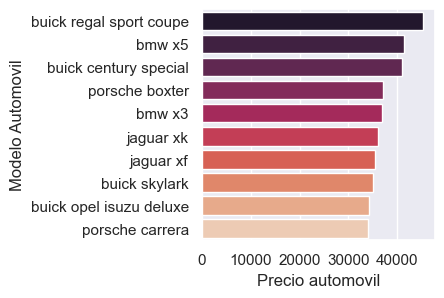

In [12]:
autos_higher = autos.sort_values(['price'], ascending = False).reset_index(drop=True)

autos_higher = autos_higher[['CarName', 'doornumber', 'carbody', 'price']].head(10)

sns.set(rc={'figure.figsize':(3,3)})
ax = sns.barplot(y="CarName",x="price", data=autos_higher,palette="rocket")
ax.set(xlabel = 'Precio automovil', ylabel = 'Modelo Automovil')
plt.show()

##### _Detalle de los 10 autos mas baratos

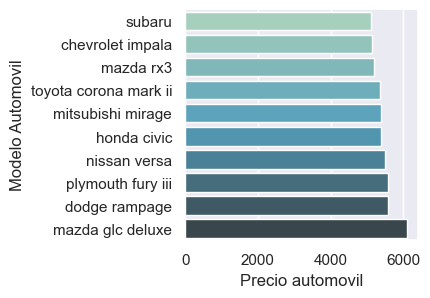

In [13]:
autos_lower = autos.sort_values(['price'], ascending = True).reset_index(drop=True)

autos_lower = autos_lower[['CarName', 'doornumber', 'carbody', 'price']].head(10)

sns.set(rc={'figure.figsize':(3,3)})
ax = sns.barplot(y="CarName",x="price", data=autos_lower,palette="GnBu_d")
ax.set(xlabel = 'Precio automovil', ylabel = 'Modelo Automovil')
plt.show()

##### _Detalle de los 10 autos de mayor cilindrada

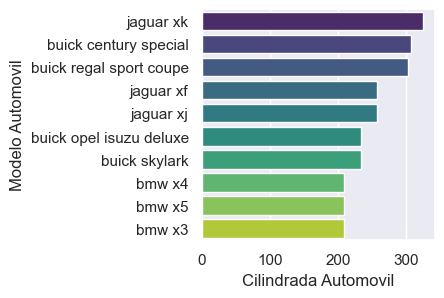

In [14]:
autos_enginesize = autos.sort_values(['enginesize'], ascending = False).reset_index(drop=True)

autos_enginesize = autos_enginesize[['CarName', 'doornumber', 'carbody', 'enginesize']].head(10)

sns.set(rc={'figure.figsize':(3,3)})
ax = sns.barplot(y="CarName",x="enginesize", data=autos_enginesize, palette="viridis")
ax.set(xlabel = 'Cilindrada Automovil', ylabel = 'Modelo Automovil')
plt.show()

##### _Cantidad de compañias automotrices,  segun dataset, por pais de origen 

In [15]:
#A fin de geo-referenciar cada una de las compañias; creamos un DataFrame que contenga la longitud
#y latitud
df_company = pd.DataFrame()

df_company['CompanyName'] = ['buick', 'bmw', 'porsche', 'jaguar', 'audi', 'volvo', 'nissan',
       'saab', 'mazda', 'peugeot', 'toyota', 'mercury', 'alfa-romeo',
       'mitsubishi', 'volkswagen', 'dodge', 'honda', 'plymouth', 'subaru',
       'isuzu', 'renault', 'chevrolet']

df_company['CompanyCountry'] = ['usa', 'germany', 'germany', 'uk', 'germany', 'sweden', 'japan',
       'sweden', 'japan', 'france', 'japan', 'usa', 'italy',
       'japan', 'germany', 'usa', 'japan', 'usa', 'japan',
       'japan', 'france', 'usa']

#Ordenamos las compañias que segun su cantidad (de mayor a menor)
gk = df_company.groupby('CompanyCountry').count().sort_values(by = 'CompanyName', ascending=False)

gk.reset_index(inplace = True)

gk['Long'] = [138, -97, 9, 2, 15, 12.8333, -2]

gk['Lat'] = [36, 38, 51, 46, 62, 42.8333, 54]

gk

,CompanyCountry,CompanyName,Long,Lat
0,japan,7,138.0000,36.0000
1,usa,5,-97.0000,38.0000
2,germany,4,9.0000,51.0000
3,france,2,2.0000,46.0000
4,sweden,2,15.0000,62.0000
5,italy,1,12.8333,42.8333
6,uk,1,-2.0000,54.0000


##### _Geo-referenciamos las compañias automotrices de acuerdo a su pais. El tamaño de la burbuja las cuantifica.

(Se puede interactuar con el mapa a fin de obtener mas informacion)

In [16]:
gk['CompanyName'] = gk['CompanyName'].astype(float)

map1 = folium.Map(location=[20, 25], zoom_start=2) #US=[39,-98] Europe =[45, 5]

for i in range(0,len(gk)):
   folium.Circle(
      location=[gk.iloc[i]['Lat'], gk.iloc[i]['Long']],
      tooltip = "CompanyCountry: "+ gk.iloc[i]['CompanyCountry']+"<br>Companies: "+str(gk.iloc[i]['CompanyName'].astype(int)),
      radius=gk.iloc[i]['CompanyName']*120000,
      color='MediumSlateBlue',
      fill=True,
      fill_color='rgb(8,48,107)').add_to(map1)
#color='crimson'

map1

##### _Visualizamos la cantidad de modelos por nombre de compañia  / modelos mas comunes.

(Se puede interactuar con el grafico a fin de obtener mas informacion)

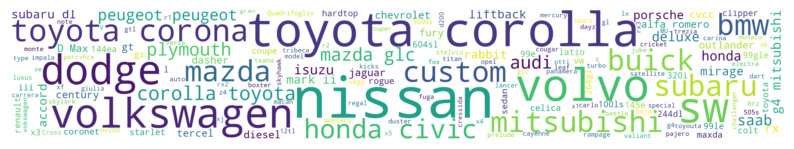

In [17]:
wc = WordCloud(width = 3000, height = 500, background_color ='white',
                min_font_size = 10, random_state = 123).generate(' '.join(car_name))

plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()


autos_info = autos.CompanyName.value_counts()

autos_info = pd.DataFrame(autos_info).reset_index()

autos_info.rename(columns={"CompanyName": "Count", "index": "CompanyName"}, inplace = True)

# text_auto='.2s', si se desea utilizar decimales
fig = px.bar(autos_info, y='Count', x='CompanyName', text_auto='True', height=450)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(xaxis_title="Nombre Compañia", yaxis_title="Cantidad Modelos")

fig.show()

##### _Visualizando los precios de los autos y su distribucion

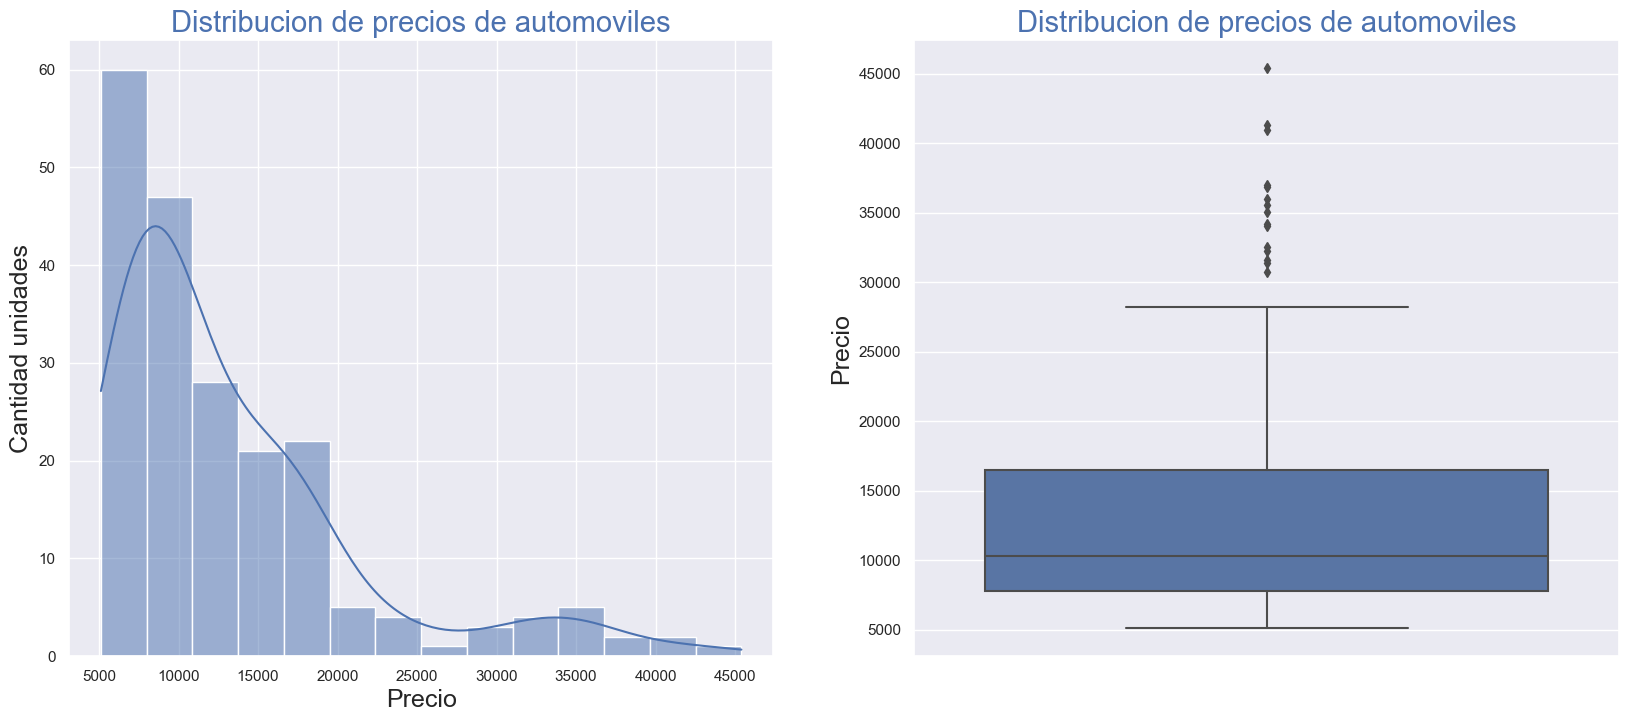

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribucion de precios de automoviles', color='C0', fontsize=21)
plt.xlabel('Precio', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)
sns.histplot(autos.price, kde=True)

plt.subplot(1,2,2)
plt.title('Distribucion de precios de automoviles', color='C0', fontsize=21)
sns.boxplot(y=autos.price)
plt.ylabel('Precio', fontsize=18)

plt.show()

In [19]:
print(autos.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]).round(2))

count      205.00
mean     13276.70
std       7988.85
min       5118.00
25%       7788.00
50%      10295.00
75%      16503.00
85%      18500.00
90%      22563.00
100%     45400.00
max      45400.00
Name: price, dtype: float64


In [20]:
#Listamos las variables categoricas del DataFrame
autos_categorical = autos.select_dtypes(exclude="number")

#autos_categorical.columns.tolist()

##### _Visualizando las variables categoricas


- [x] CompanyName
- [x] fueltype
- [x] aspiration
- [x] doornumber
- [x] carbody
- [x] drivewheel
- [x] enginelocation
- [x] enginetype
- [x] cylindernumber
- [x] fuelsystem

##### _Company Name

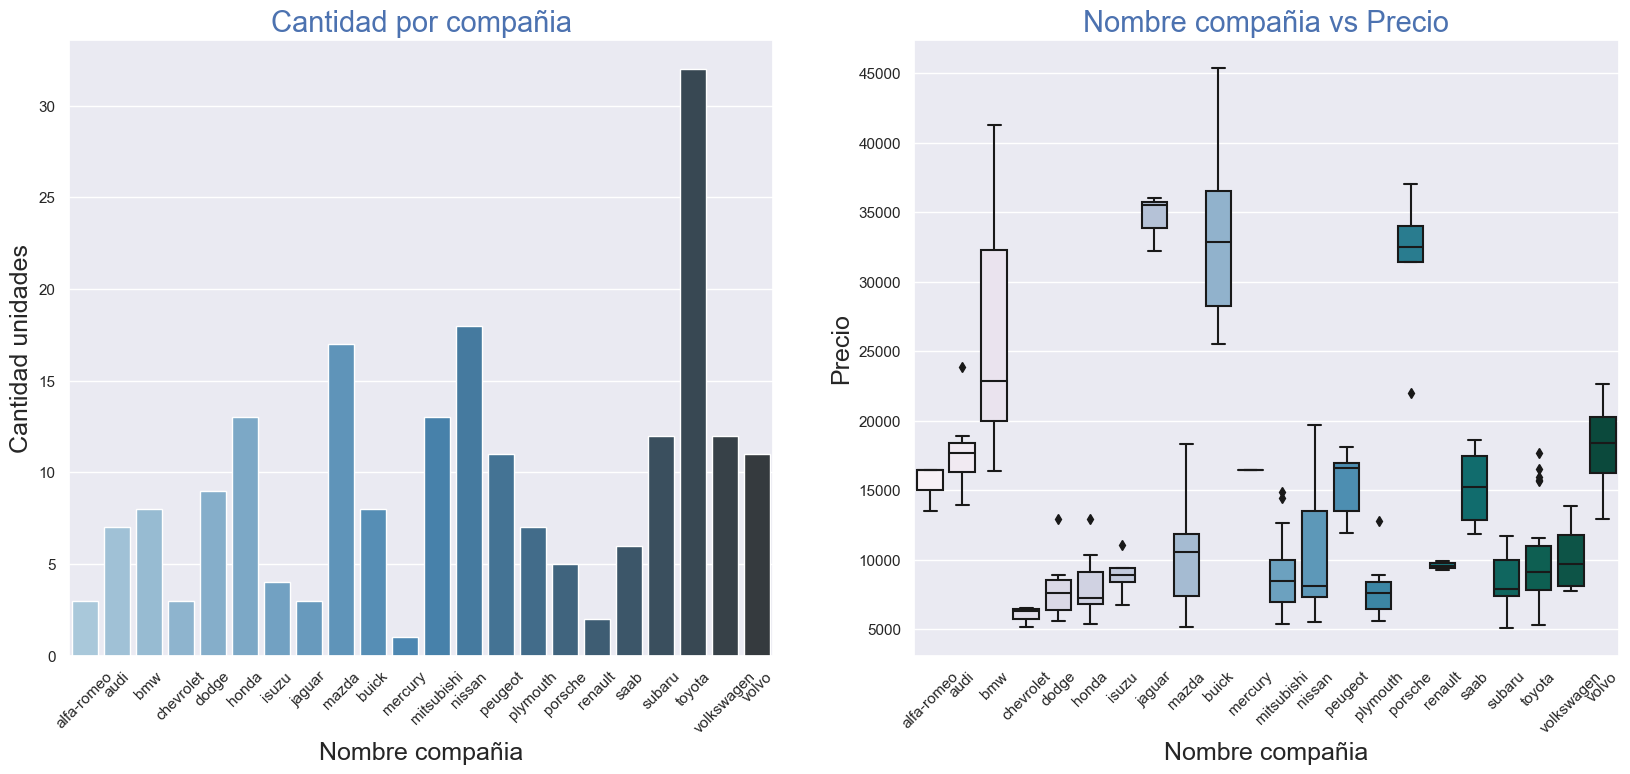

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Cantidad por compañia', color='C0', fontsize=21)
sns.countplot(x=autos.CompanyName, palette=("Blues_d"))
plt.xlabel('Nombre compañia', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('Nombre compañia vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.CompanyName, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Nombre compañia', fontsize=18)
plt.ylabel('Precio', fontsize=18)
plt.xticks(rotation=45)

plt.show()

##### _Fuel Type

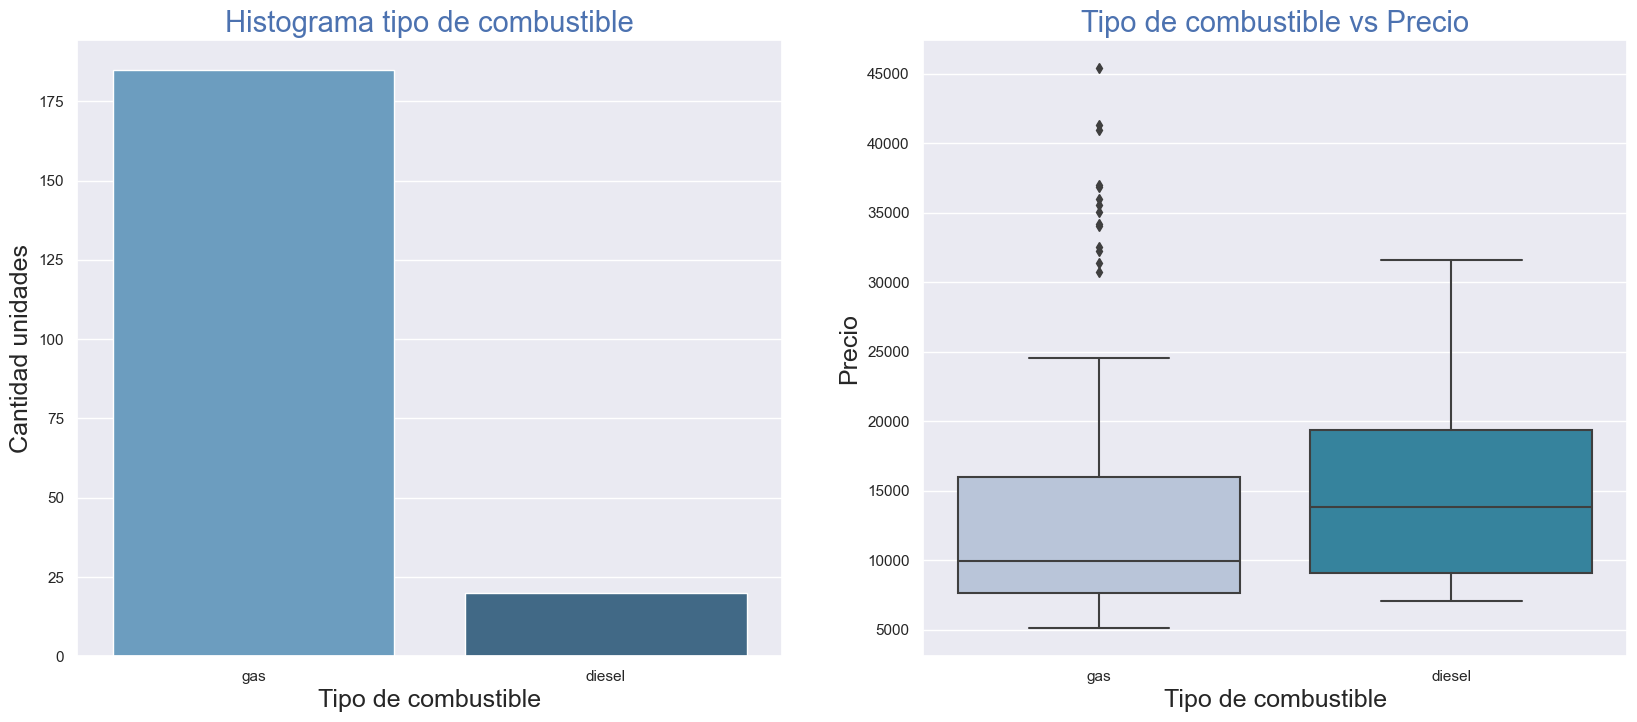

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma tipo de combustible', color='C0', fontsize=21)
sns.countplot(x=autos.fueltype, palette=("Blues_d"))
plt.xlabel('Tipo de combustible', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Tipo de combustible vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.fueltype, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Tipo de combustible', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

##### _Aspiration

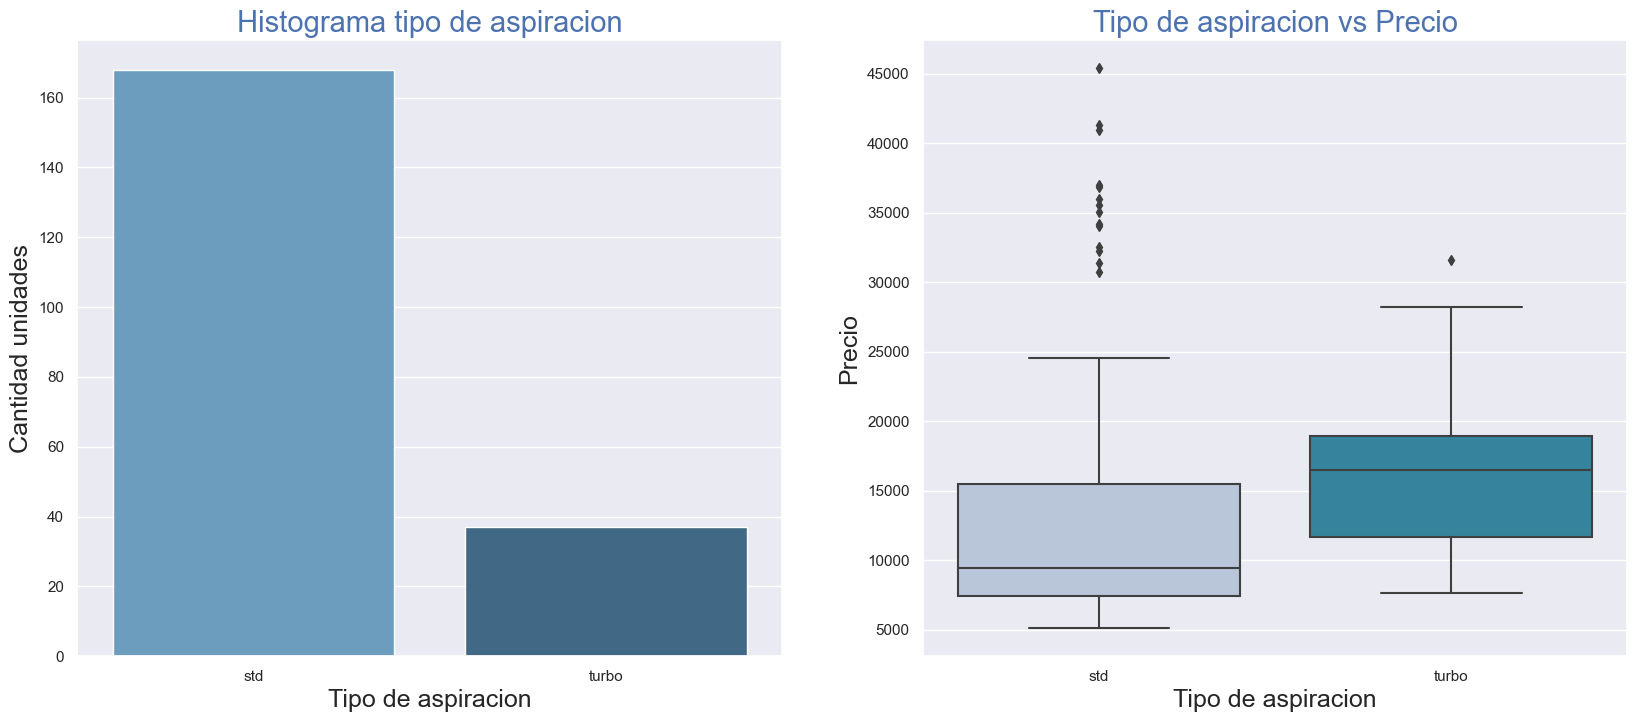

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma tipo de aspiracion', color='C0', fontsize=21)
sns.countplot(x=autos.aspiration, palette=("Blues_d"))
plt.xlabel('Tipo de aspiracion', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Tipo de aspiracion vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.aspiration, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Tipo de aspiracion', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

##### _Door Number

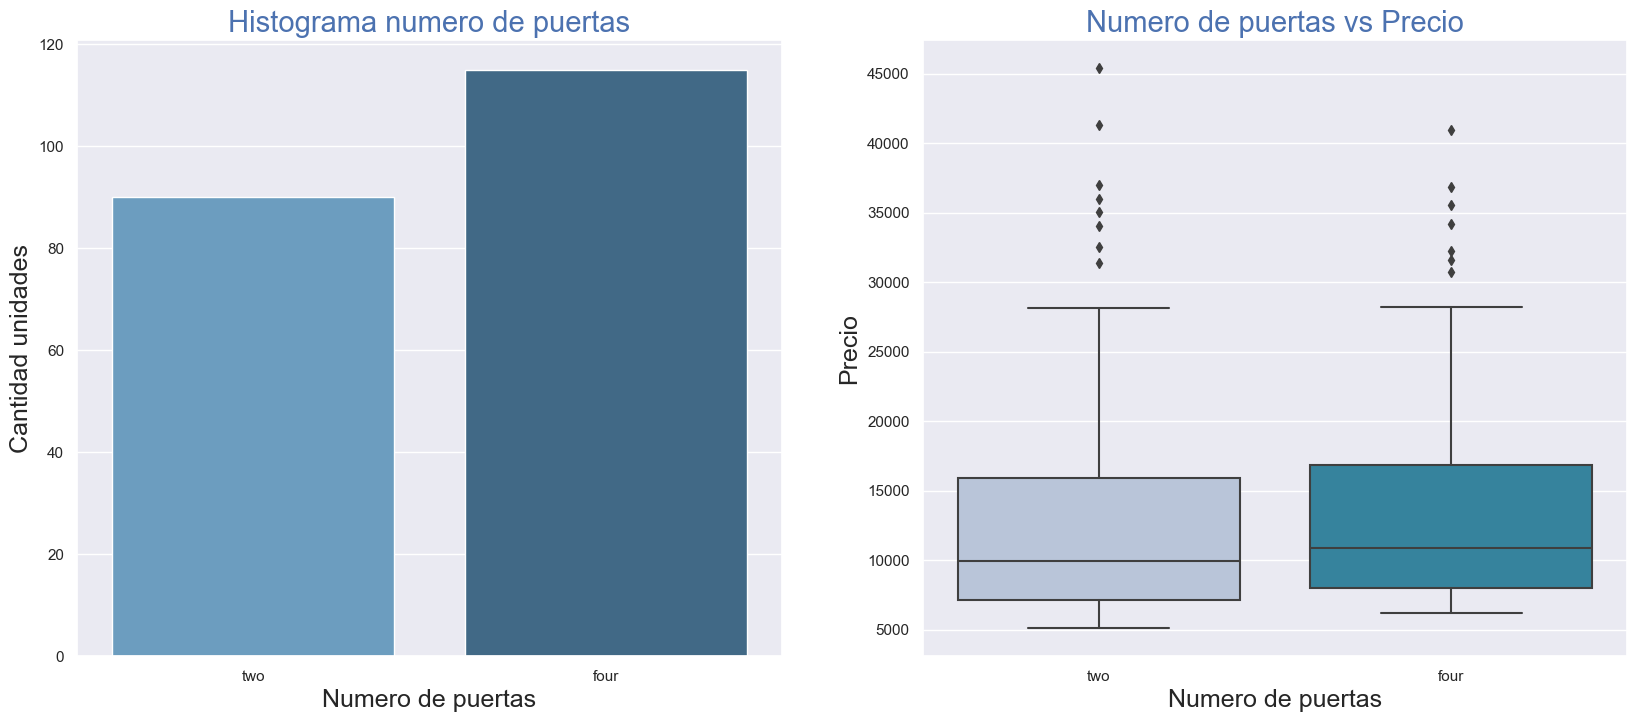

In [24]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma numero de puertas', color='C0', fontsize=21)
sns.countplot(x=autos.doornumber, palette=("Blues_d"))
plt.xlabel('Numero de puertas', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Numero de puertas vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.doornumber, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Numero de puertas', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

##### _Car Body

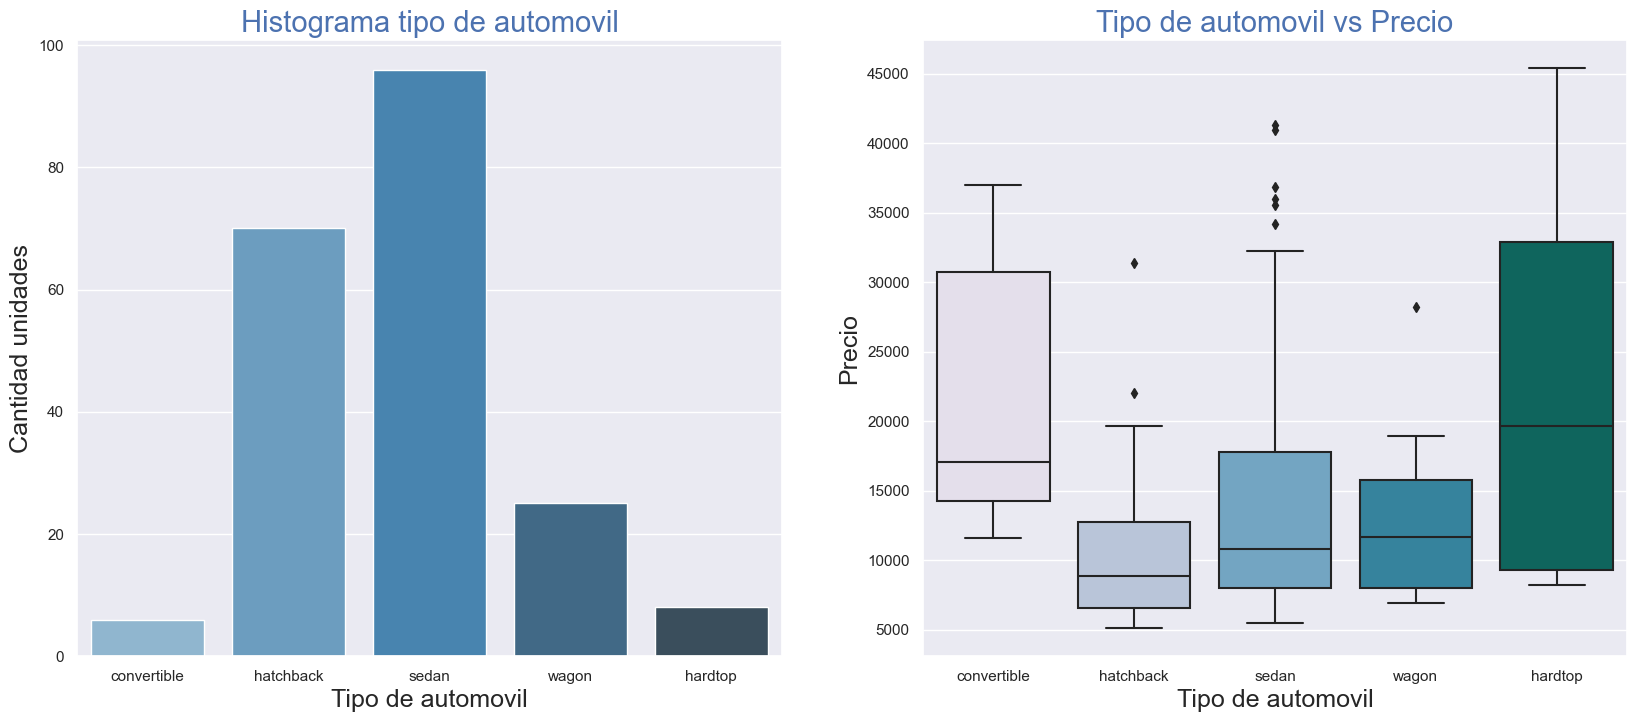

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma tipo de automovil', color='C0', fontsize=21)
sns.countplot(x=autos.carbody, palette=("Blues_d"))
plt.xlabel('Tipo de automovil', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Tipo de automovil vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.carbody, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Tipo de automovil', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

##### _Drive Wheel

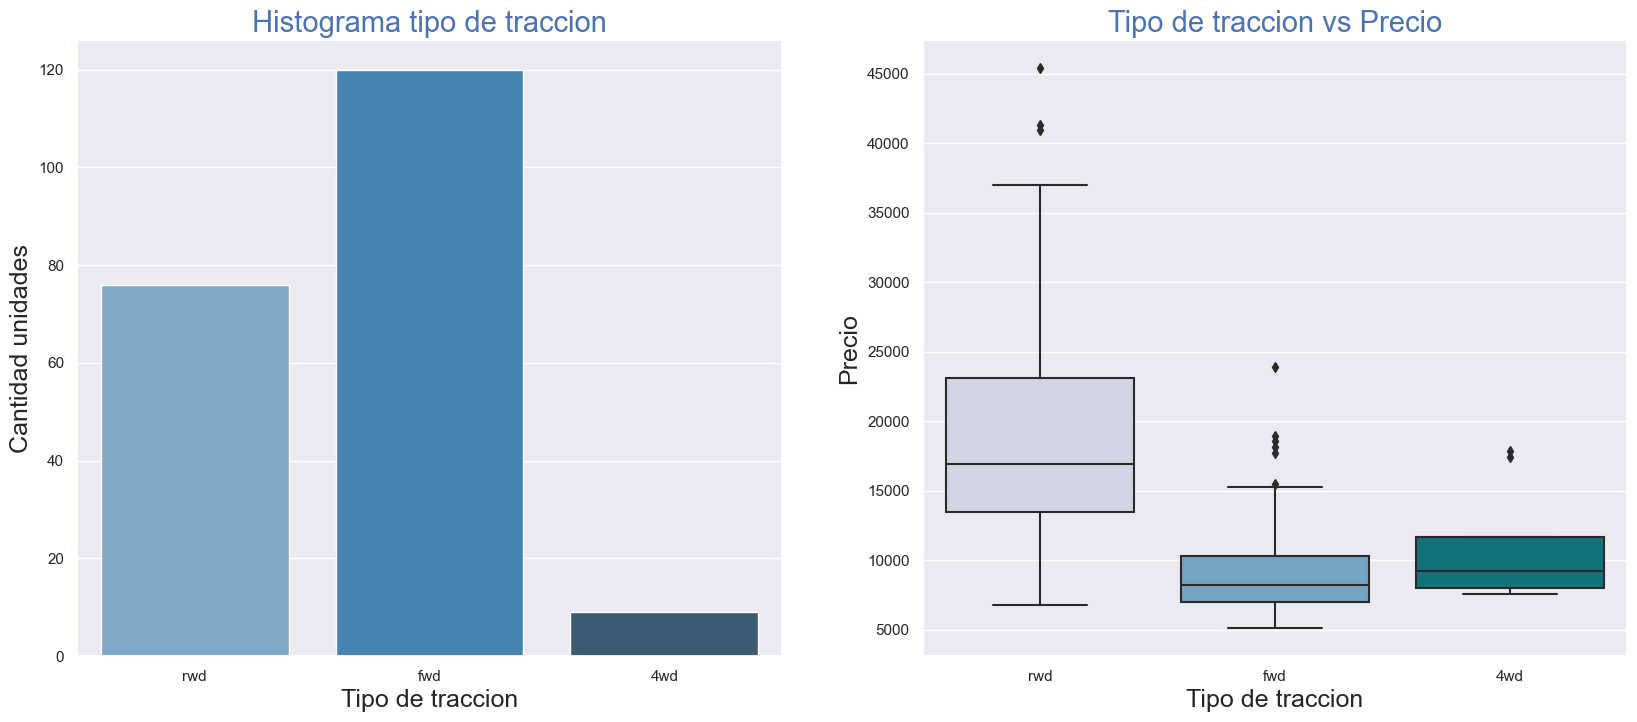

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma tipo de traccion', color='C0', fontsize=21)
sns.countplot(x=autos.drivewheel, palette=("Blues_d"))
plt.xlabel('Tipo de traccion', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Tipo de traccion vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.drivewheel, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Tipo de traccion', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

##### _Engine Location

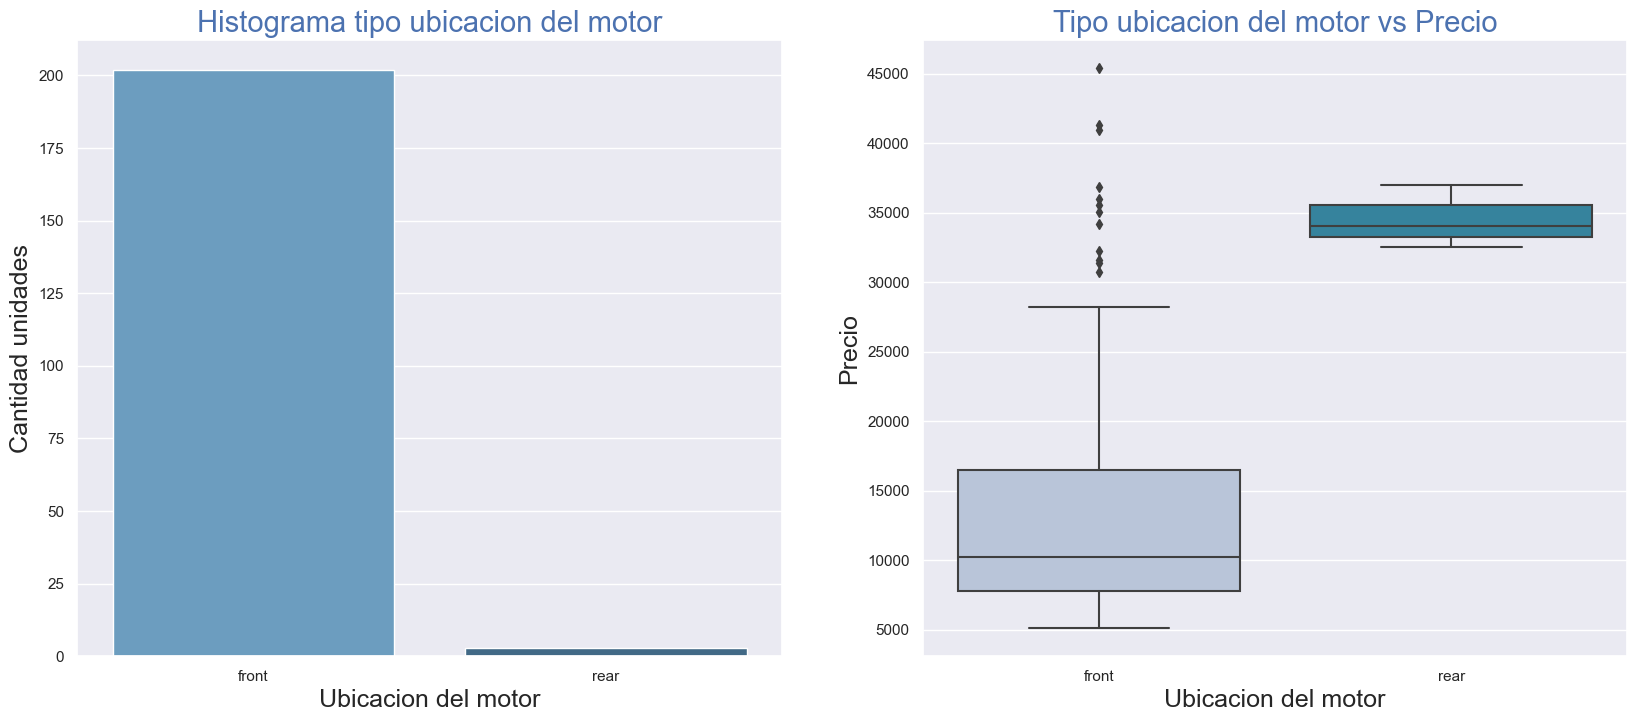

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma tipo ubicacion del motor', color='C0', fontsize=21)
sns.countplot(x=autos.enginelocation, palette=("Blues_d"))
plt.xlabel('Ubicacion del motor', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Tipo ubicacion del motor vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.enginelocation, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Ubicacion del motor', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

###### _Engine Type

- [x] **dohc:** Dual OverHead Cam
- [x] **ohcv:** OverHead Cam and Valve
- [x] **ohc:** OverHead Cam
- [x] **l:** L engine
- [x] **rotor:** Rotary engine
- [x] **ohcf:** OverHead Cam and Valve F
- [x] **dohcv:** Dual OverHead Cam and Valve

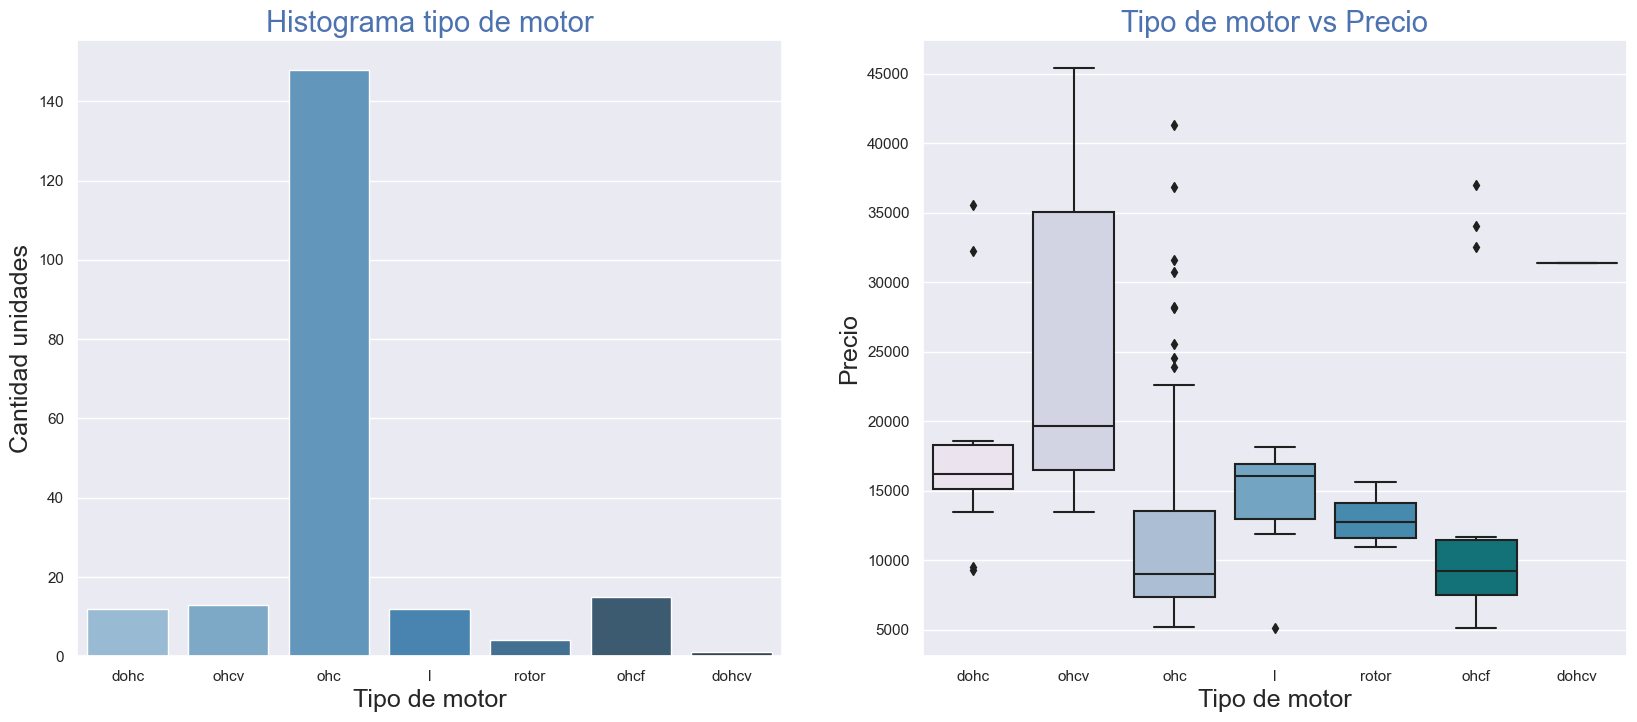

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma tipo de motor', color='C0', fontsize=21)
sns.countplot(x=autos.enginetype, palette=("Blues_d"))
plt.xlabel('Tipo de motor', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Tipo de motor vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.enginetype, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Tipo de motor', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

##### _Cylinder Number

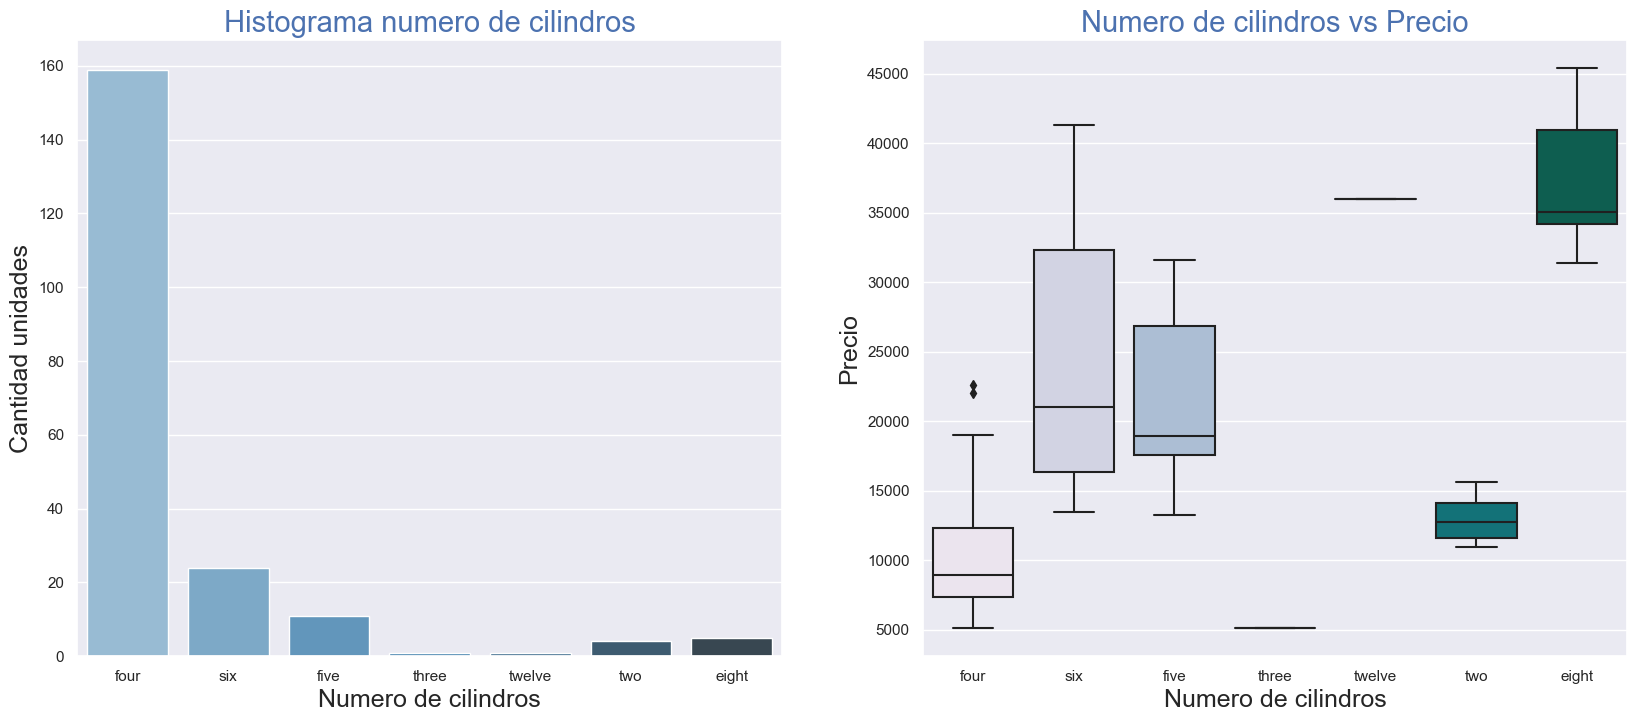

In [29]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma numero de cilindros', color='C0', fontsize=21)
sns.countplot(x=autos.cylindernumber, palette=("Blues_d"))
plt.xlabel('Numero de cilindros', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Numero de cilindros vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.cylindernumber, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Numero de cilindros', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

##### _Fuel System


- [x] **mpfi:** Multi Point Fuel Injection
- [x] **2bbl:** 2 Barrel Carburetor (*)
- [x] **mfi:** Multi Port Fuel Injection
- [x] **1bbl:** 1 Barrel Carburetor (*)
- [x] **spfi:** Single Point Fuel Injection
- [x] **4bbl:** 4 Barrel Carburetor (*)
- [x] **idi:** Indirect injection
- [x] **spdi:** Single Point Direct Injection

(*)"bbl" es la abreviatura oficial de Barrel

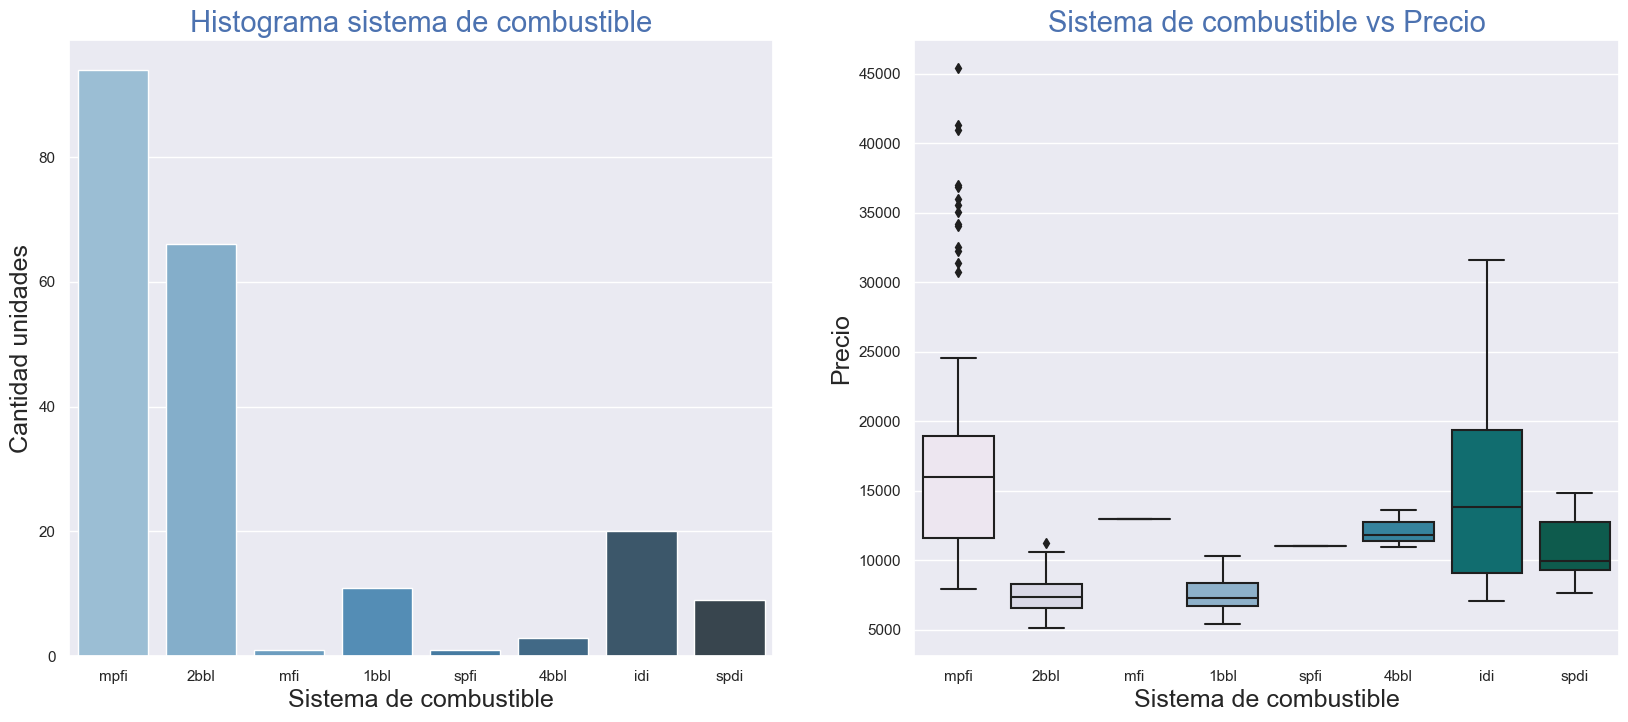

In [30]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma sistema de combustible', color='C0', fontsize=21)
sns.countplot(x=autos.fuelsystem, palette=("Blues_d"))
plt.xlabel('Sistema de combustible', fontsize=18)
plt.ylabel('Cantidad unidades', fontsize=18)

plt.subplot(1,2,2)
plt.title('Sistema de combustible vs Precio', color='C0', fontsize=21)
sns.boxplot(x=autos.fuelsystem, y=autos.price, palette=("PuBuGn"))
plt.xlabel('Sistema de combustible', fontsize=18)
plt.ylabel('Precio', fontsize=18)

plt.show()

**Conclusión:**

**Los datos muestran claramente algunos aspectos importantes del precio de los automóviles. En otras palabras, observamos los siguientes puntos:**

**La traccion trasera tiene un precio medio más alto que la delantera;
Los tipos de automovil convertible y hardtop tienen un precio medio más alto que el resto;
Mayor cantidad de cilindros representan en promedio un precio mas alto;
Los tipos de motor ohcv y dohcv tienen un precio medio más alto que el resto;
Finalmente, a partir de los datos disponibles no pudimos ver ninguna influencia del número de puertas en el precio de los coches.**

In [31]:
#Listamos las variables numericas del DataFrame
autos_numerical = autos.select_dtypes(include="number")

#autos_numerical.columns.tolist()

##### _Visualizando las variables numericas


- [x] **wheelbase**
- [x] **carlength**
- [x] **carwidth**
- [x] **carheight**
- [x] **curbweight**
- [x] **enginesize**
- [x] **boreratio**
- [x] **stroke**
- [x] **compressionratio**
- [x] **horsepower**
- [x] **peakrpm**
- [x] **citympg**
- [x] **highwaympg**
- [x] **car_price**

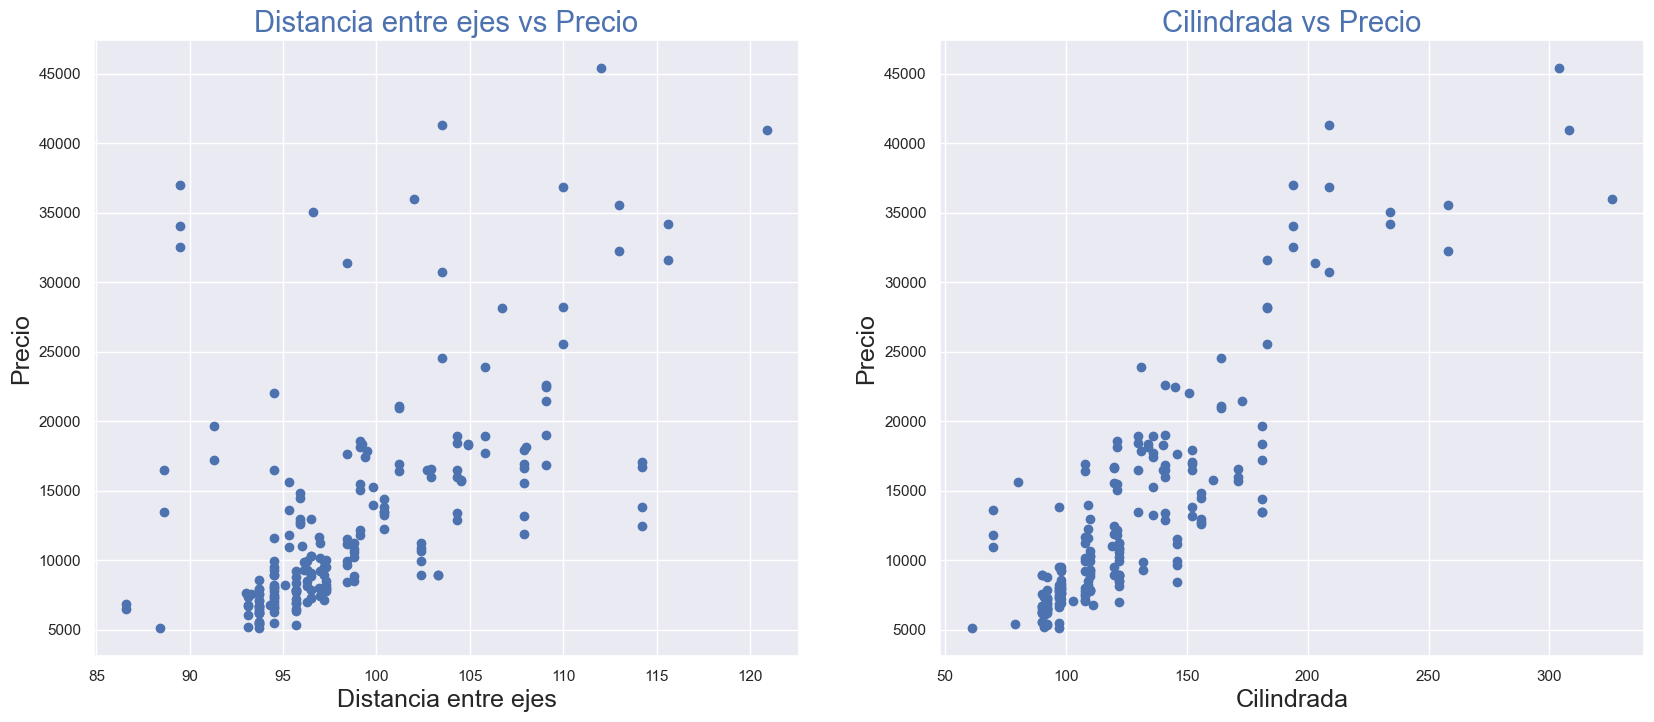

In [32]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(autos['wheelbase'], autos['price'])
plt.title('Distancia entre ejes vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Distancia entre ejes', fontsize=18)

plt.subplot(1,2,2)
plt.scatter(autos['enginesize'], autos['price'])
plt.title('Cilindrada vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Cilindrada', fontsize=18)

plt.show()

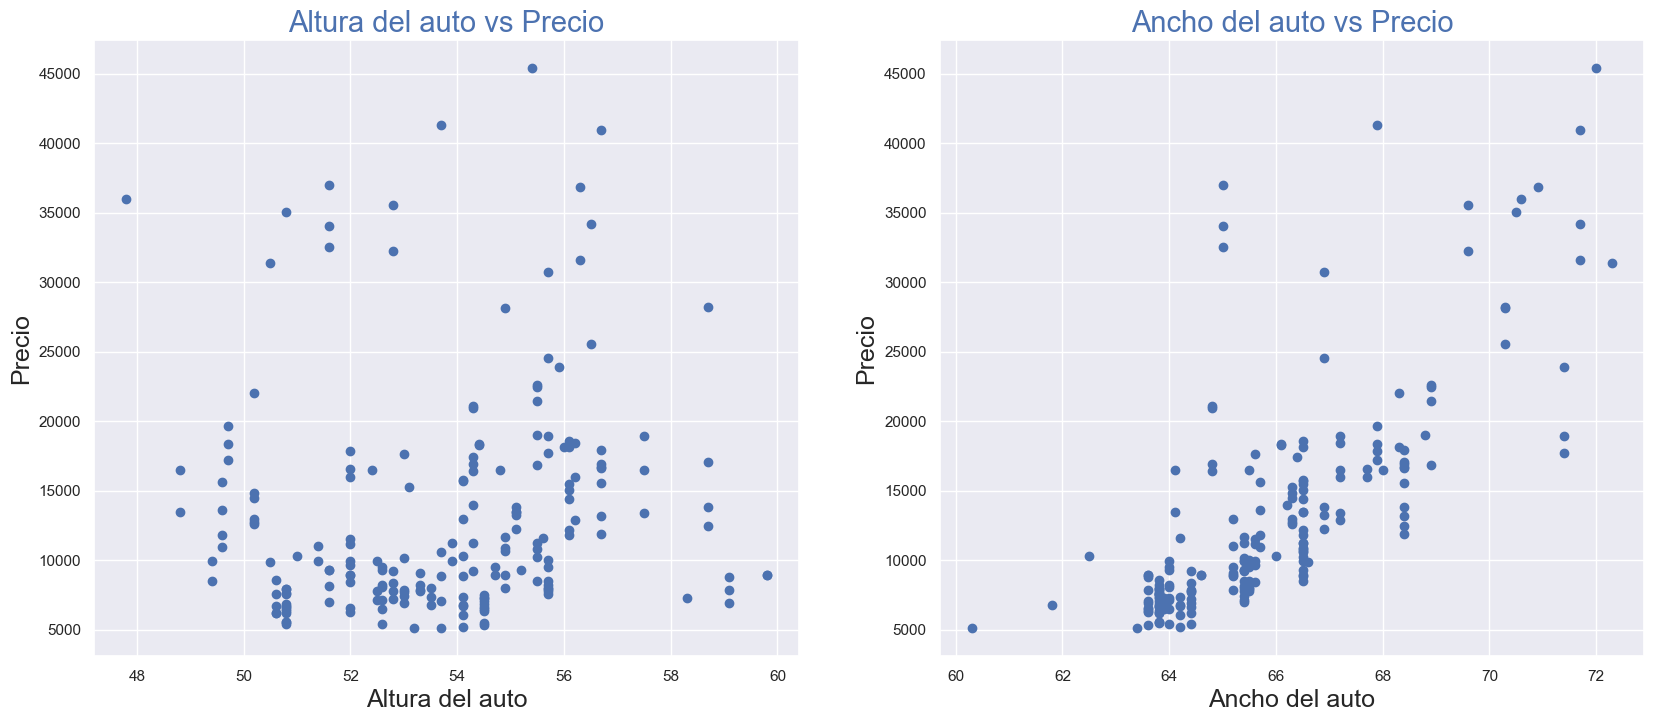

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(autos['carheight'], autos['price'])
plt.title('Altura del auto vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Altura del auto', fontsize=18)

plt.subplot(1,2,2)
plt.scatter(autos['carwidth'], autos['price'])
plt.title('Ancho del auto vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Ancho del auto', fontsize=18)

plt.show()

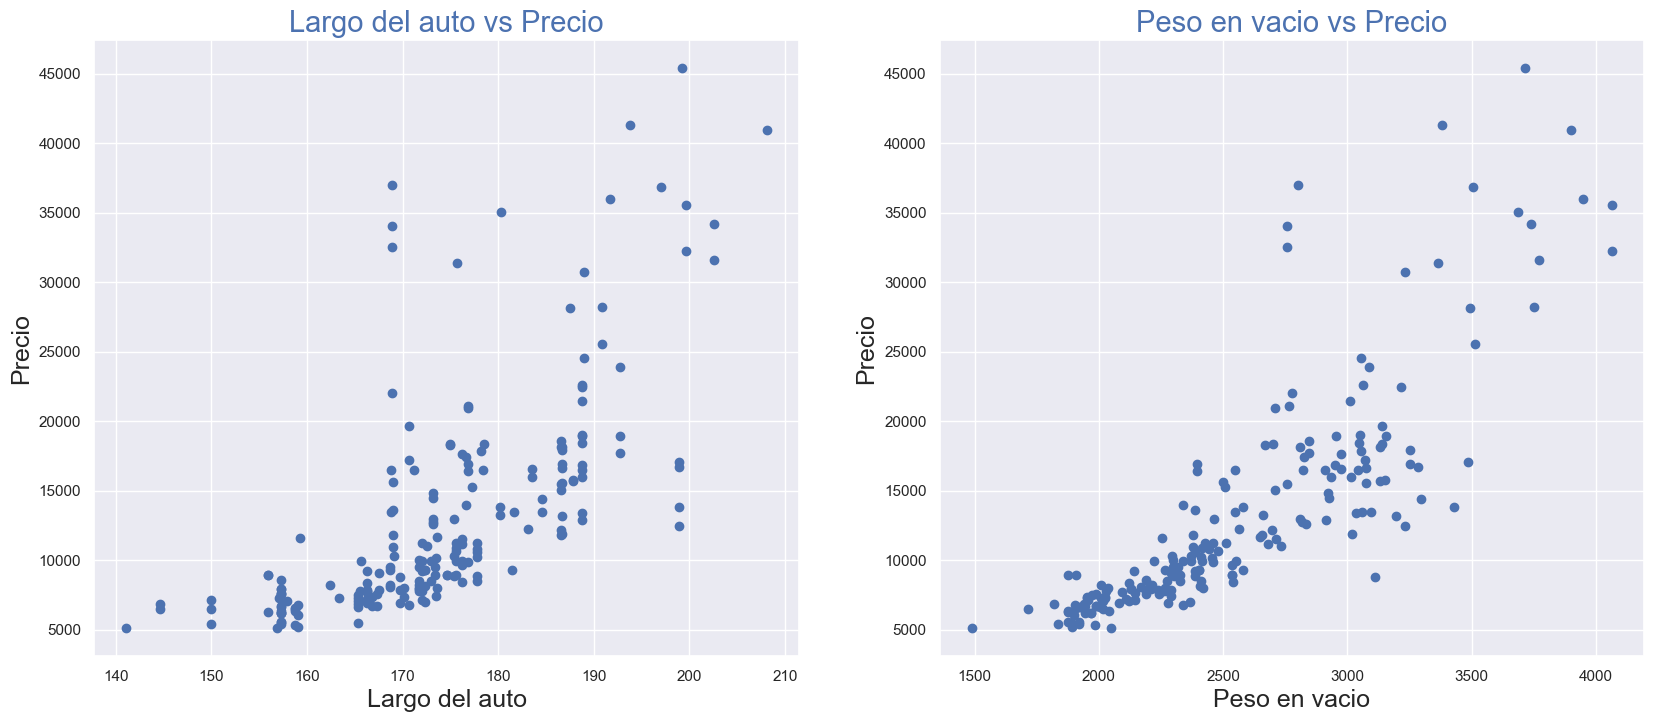

In [34]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(autos['carlength'], autos['price'])
plt.title('Largo del auto vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Largo del auto', fontsize=18)

plt.subplot(1,2,2)
plt.scatter(autos['curbweight'], autos['price'])
plt.title('Peso en vacio vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Peso en vacio', fontsize=18)

plt.show()

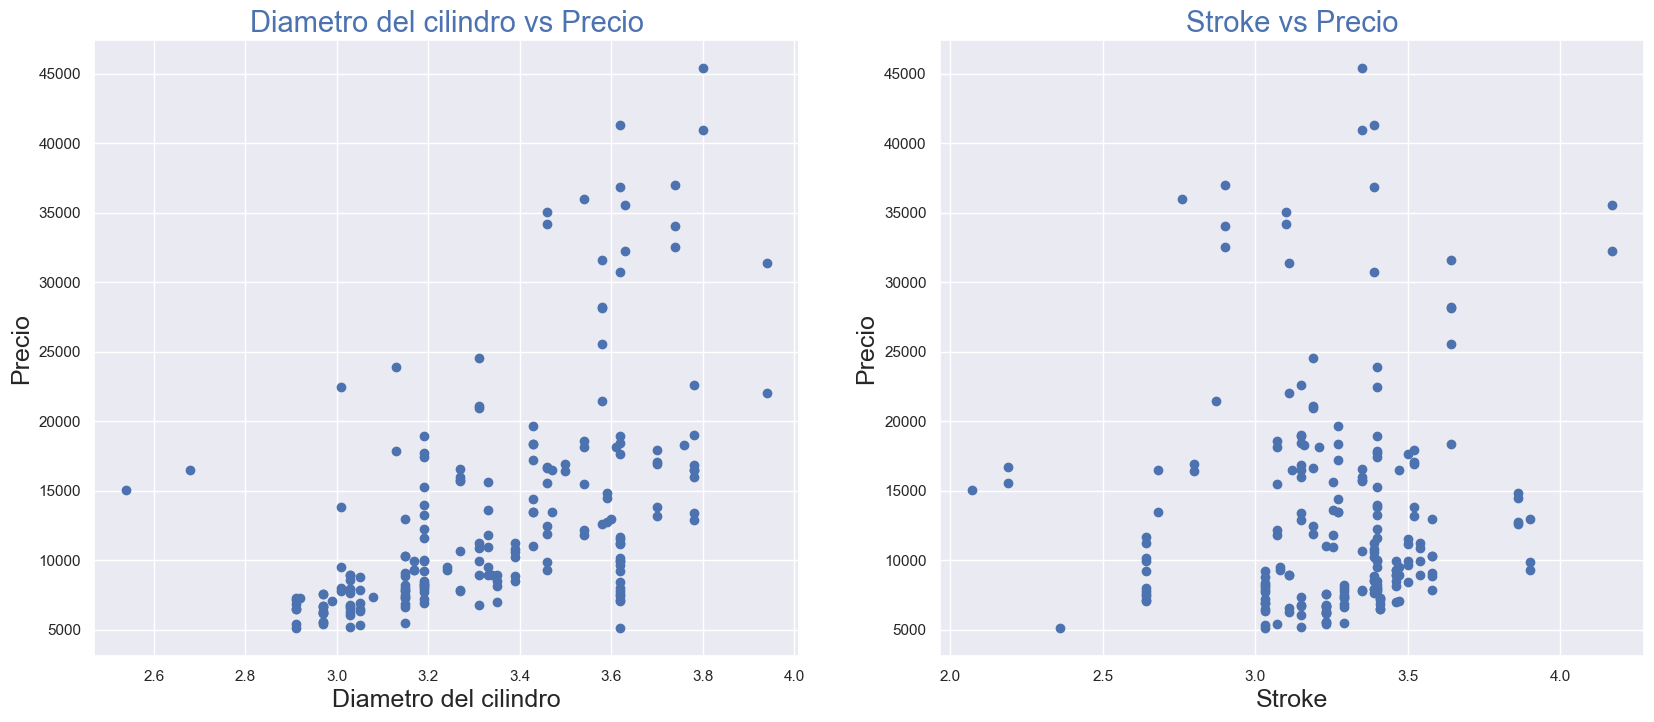

In [35]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(autos['boreratio'], autos['price'])
plt.title('Diametro del cilindro vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Diametro del cilindro', fontsize=18)

plt.subplot(1,2,2)
plt.scatter(autos['stroke'], autos['price'])
plt.title('Stroke vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Stroke', fontsize=18)

plt.show()

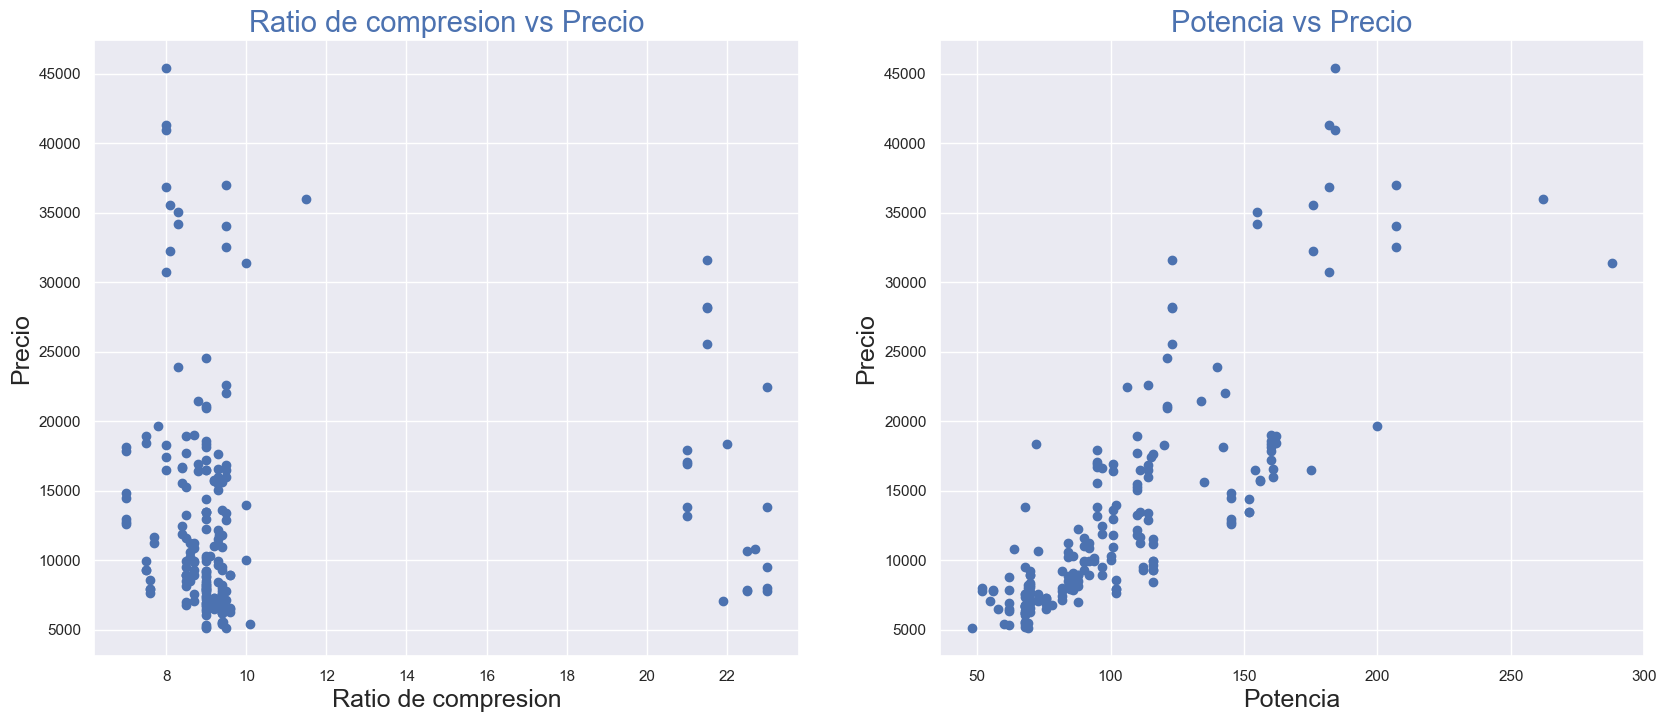

In [36]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(autos['compressionratio'], autos['price'])
plt.title('Ratio de compresion vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Ratio de compresion', fontsize=18)

plt.subplot(1,2,2)
plt.scatter(autos['horsepower'], autos['price'])
plt.title('Potencia vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Potencia', fontsize=18)

plt.show()

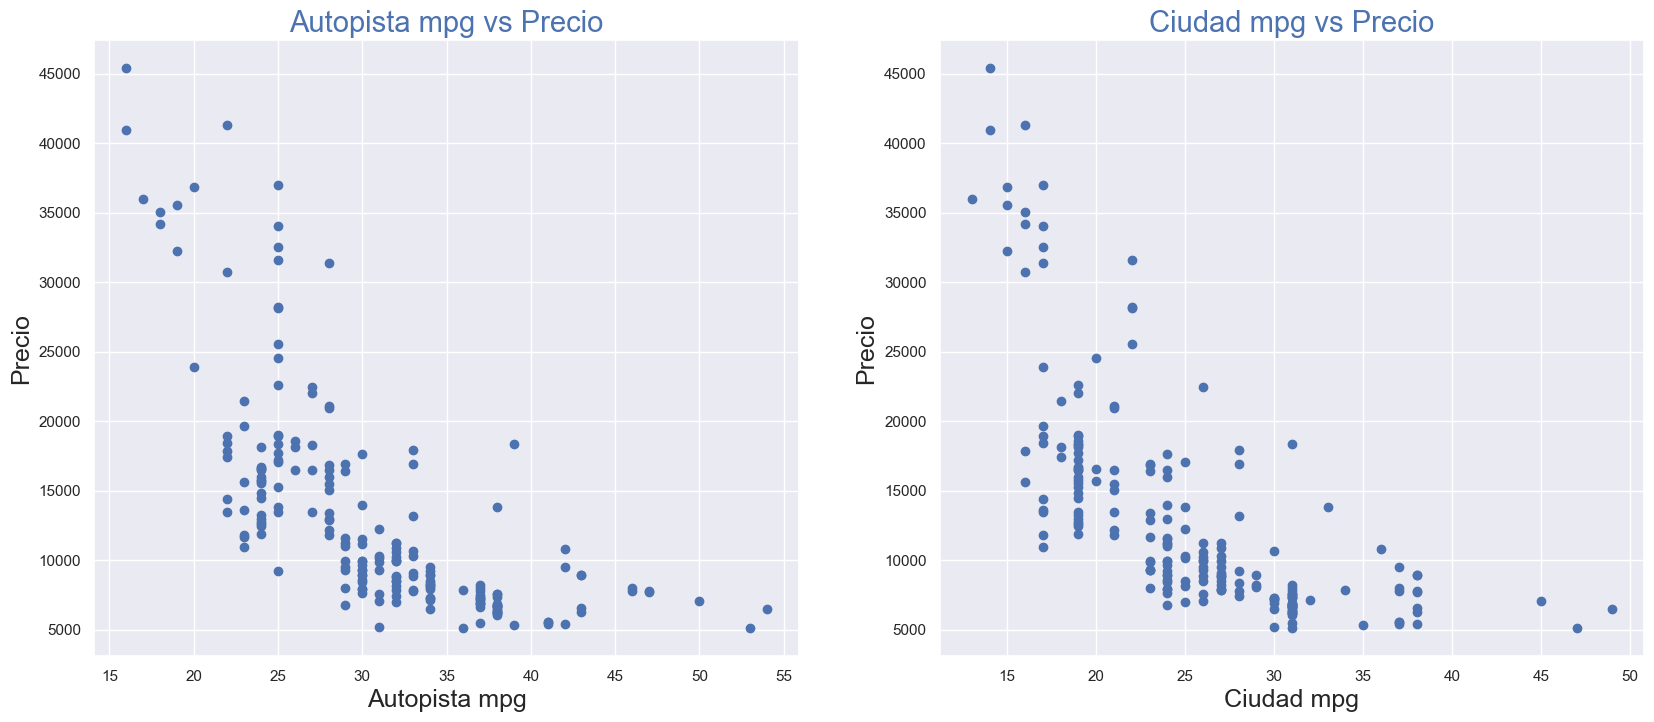

In [37]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(autos['highwaympg'], autos['price'])
plt.title('Autopista mpg vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Autopista mpg', fontsize=18)

plt.subplot(1,2,2)
plt.scatter(autos['citympg'], autos['price'])
plt.title('Ciudad mpg vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('Ciudad mpg', fontsize=18)

plt.show()

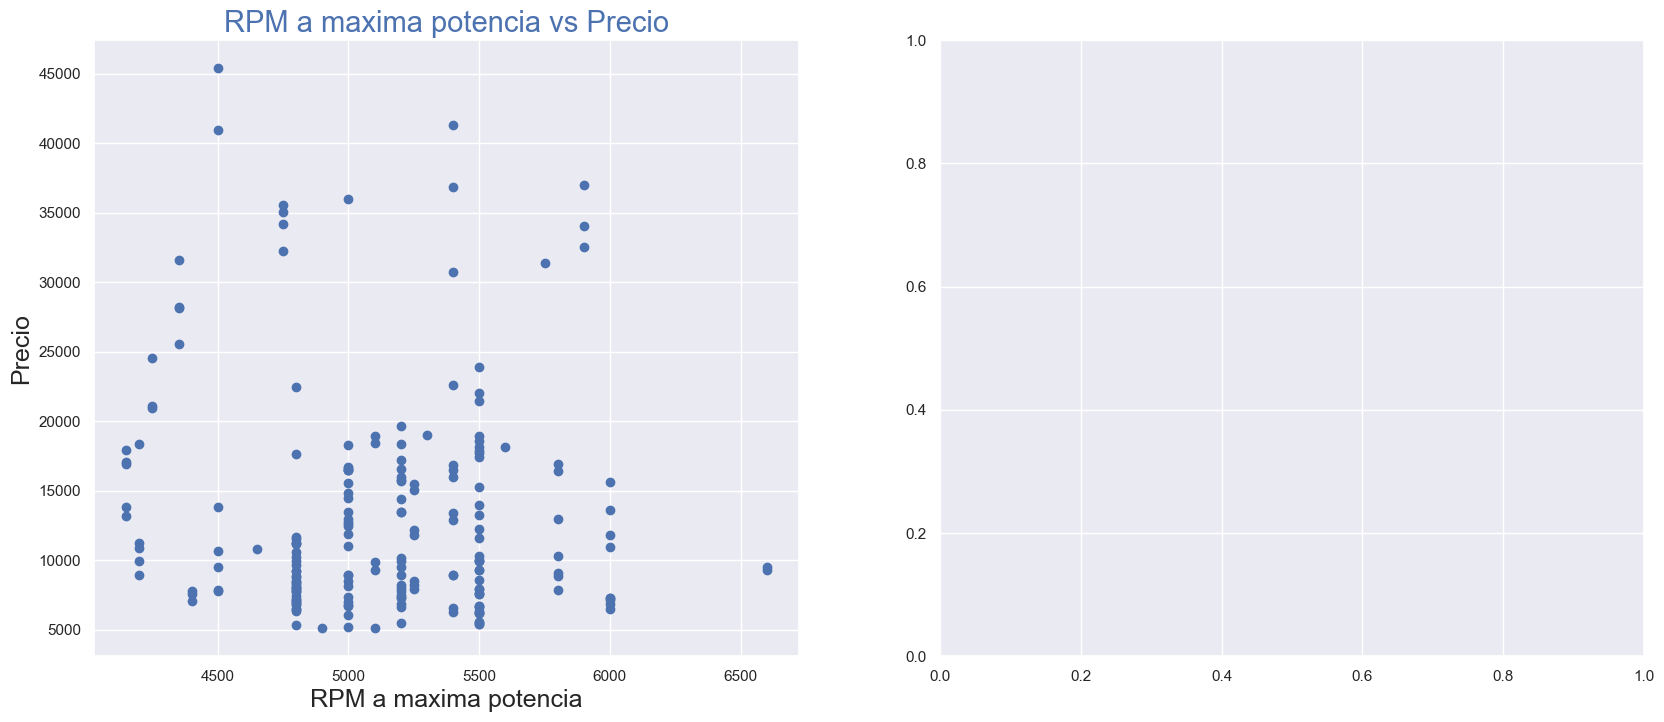

In [38]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.scatter(autos['peakrpm'], autos['price'])
plt.title('RPM a maxima potencia vs Precio', color='C0', fontsize=21)
plt.ylabel('Precio', fontsize=18)
plt.xlabel('RPM a maxima potencia', fontsize=18)

plt.subplot(1,2,2)

plt.show()

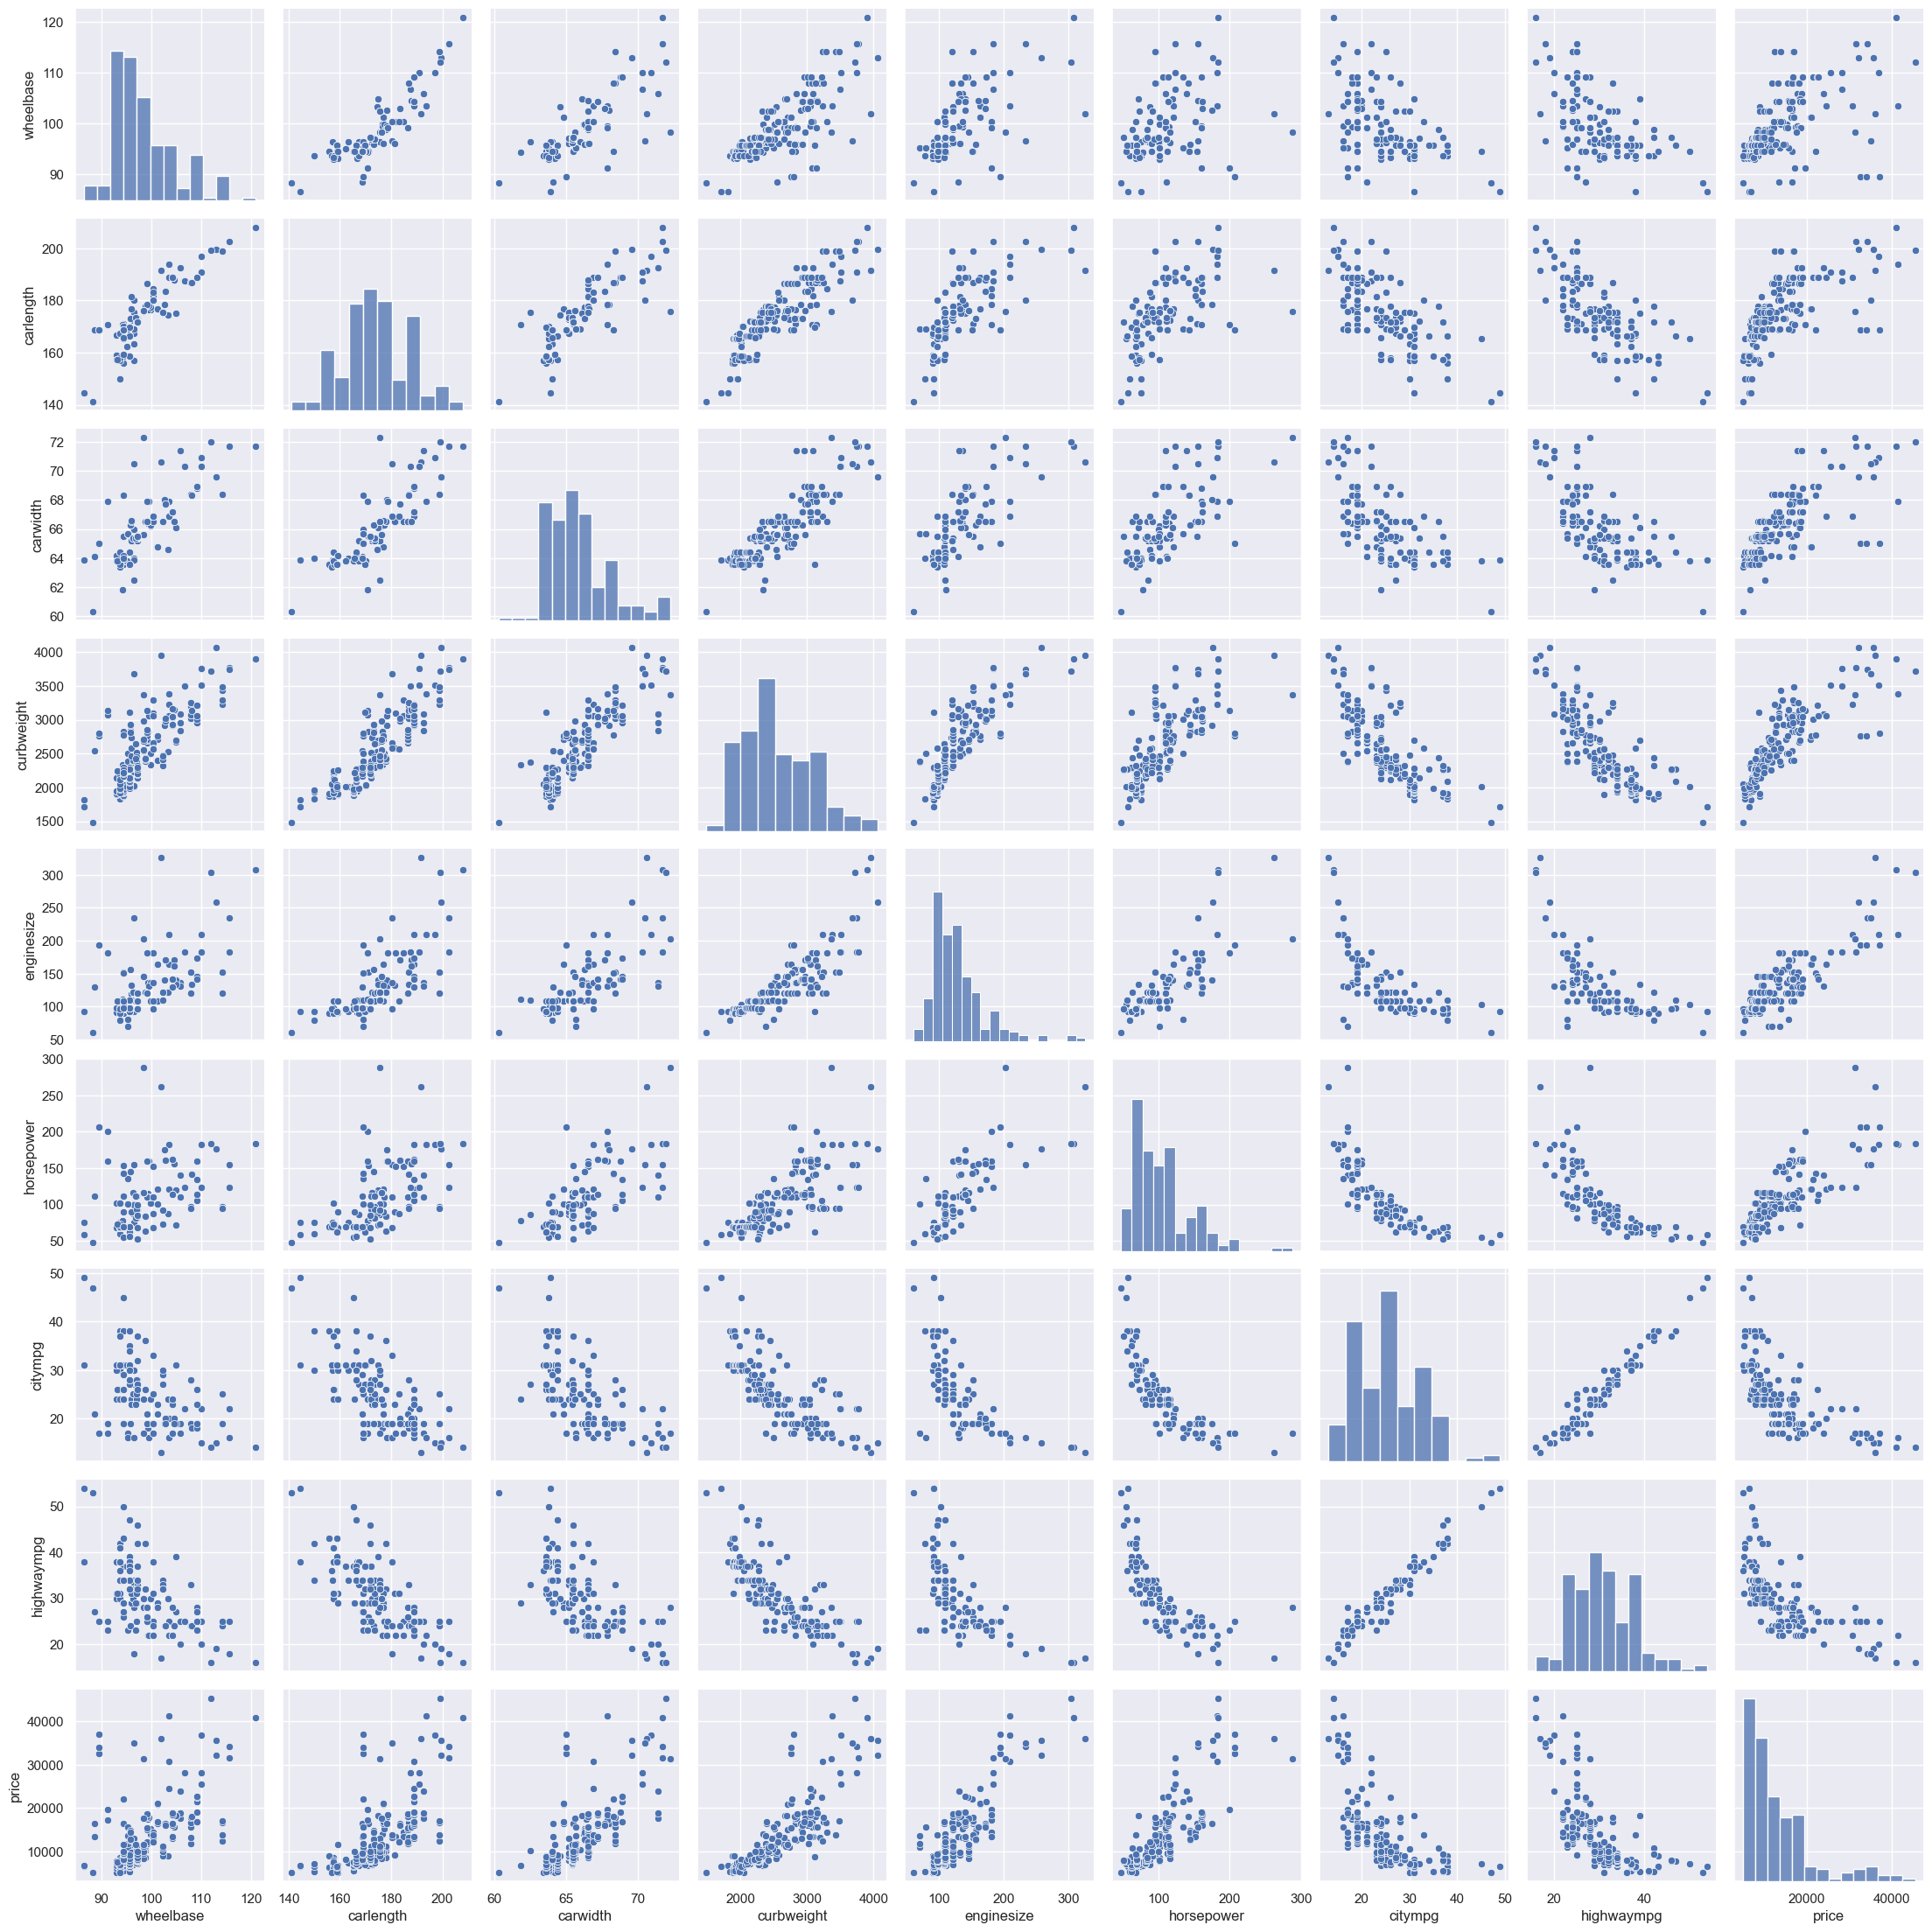

In [39]:
a = autos.drop(["car_ID", "doornumber", "carheight", "stroke", "compressionratio",
                'peakrpm', "boreratio" ], axis=1)

sns.pairplot(a)
plt.show()

In [40]:
#Unimos la columna 'CompanyCountry' al dataframe 'autos'. Esto nos permite saber el pais de origen
autos_company_merge = pd.merge(autos, df_company, how='left', on='CompanyName')

#Agrupamos por 'CompanyCountry' y generamos el promedio de los distintos valores
autos_company_mean = autos_company_merge.groupby(by='CompanyCountry').mean('car_price').reset_index()

#autos_company_mean

In [41]:
#Unimos la columna 'CompanyCountry' al dataframe 'autos_info'. Esto nos permite saber el pais de origen 
#de las marcas
autos_ciacountry_count = pd.merge(autos_info, df_company, how='left', on='CompanyName')

#Agrupamos por 'CompanyCountry' y luego sumamos la cantidad de modelos que tiene cada uno de los paises
autos_ciacountry_count = autos_ciacountry_count.groupby(by='CompanyCountry').sum('Count').reset_index()

#autos_ciacountry_count

##### _Cantidad de modelos segun el pais de la compañia

In [42]:
autos_ciacountry_count

,CompanyCountry,Count
0,france,13
1,germany,32
2,italy,3
3,japan,109
4,sweden,17
5,uk,3
6,usa,28


In [43]:
#Unimos la columna 'Count' al dataframe 'autos_layout'. Esto nos permite saber la cantidad de 
#modelos que disponibiliza cada pais
autos_layout = pd.merge(autos_company_mean, autos_ciacountry_count, how='left', on='CompanyCountry')

#Limitamos la columna a numeros enteros 
autos_layout['price'] = autos_layout['price'].astype('int64')

#Limitamos la columna a 2 decimales
autos_layout['highwaympg'] = autos_layout['highwaympg'].round(2)

autos_layout['enginesize'] = autos_layout['enginesize'].round(2)

#autos_layout

In [44]:
#Creamos una columna que contenga las marcas respectivas segun sea su pais de origen
autos_layout['CompanyName'] = ['Peugeot - Renault',
                             'Audi - BMW - Porsche - Volkswagen',
                             'Alfa-romeo',
                             'Honda - Isuzu - Mazda - Mitsubishi - Nissan - Subaru - Toyota',
                             'Saab - Volvo',
                             'Jaguar',
                             'Buick - Chevrolet - Dodge - Mercury - Plymouth']

#Renombramos las columnas a fin de que se aprecien los titulos correctamente en el grafico
autos_layout = autos_layout.rename(columns={'price':'Precio Automovil*', 
                                            'CompanyCountry':'Pais Compañia', 
                                            'highwaympg':'Autopista MPG*', 'enginesize':'Cilindrada*',
                                            'CompanyName':'Nombre Compañia', 'Count': 'Cantidad'
                                           })

#autos_layout

In [45]:
#Creamos un dataframe agrupado por 'CompanyName' con el fin de obtener el promedio de sus valores
autos_mean = autos.groupby(by='CompanyName').mean('price').reset_index()

#Unimos la columna 'Count' al dataframe 'autos_mean'. Esto nos permite cuantificar la cantidad de
#modelos segun la marca
autos_mean = pd.merge(autos_mean, autos_info, how='left', on='CompanyName')

#Unimos la columna 'CompanyCountry' al dataframe 'autos_mean'. Esto nos permite identificar el pais
#segun la marca
autos_mean = pd.merge(autos_mean, df_company, how='left', on='CompanyName')

#Limitamos la columna a numeros enteros 
autos_mean['price'] = autos_mean['price'].astype('int64')

#Limitamos la columna a 2 decimales
autos_mean['highwaympg'] = autos_mean['highwaympg'].round(2)

autos_mean['enginesize'] = autos_mean['enginesize'].round(2)

#Renombramos las columnas a fin de que se aprecien los titulos correctamente en el grafico
autos_mean = autos_mean.rename(columns={'price':'Precio Automovil*', 
                                            'CompanyCountry': 'Pais Compañia', 
                                            'highwaympg': 'Autopista MPG*', 'enginesize': 'Cilindrada*',
                                            'CompanyName': 'Nombre Compañia', 'Count': 'Cantidad'
                                           })

#autos_mean

**Entendiendo cuales son las variables que mejor explican el precio (correlacion):**

Correlación positiva: cuando una variable aumenta de valor la otra variable también aumenta.
Para que una correlación entre dos variables se considere positiva, el valor del coeficiente de correlación debe estar entre 0 (no incluido) y 1 (incluido).
Por lo tanto si el valor del coeficiente de correlación es próximo a 1, significa que la correlación entre las dos variables es positiva y muy fuerte.


Correlación negativa: cuando una variable aumenta la otra disminuye, y al revés, si una variable disminuye la otra aumenta. El valor del coeficiente de correlación está entre -1 (incluido) y 0 (no incluido).

In [46]:
#Seleccionamos las columnas numericas
numData = autos.select_dtypes(include="number")

#Excluimos la ultima columna que corresponde al precio
#Obtenemos la correlacion
var_num_corr = numData.corr()[:-1]

var_num_corr['price'].round(3)

car_ID             -0.109
wheelbase           0.578
carlength           0.683
carwidth            0.759
carheight           0.119
curbweight          0.835
enginesize          0.874
boreratio           0.553
stroke              0.079
compressionratio    0.068
horsepower          0.808
peakrpm            -0.085
citympg            -0.686
highwaympg         -0.698
Name: price, dtype: float64

In [47]:
#Renombramos la columna 'price' con un detalle mas descriptivo
var_num_corr = var_num_corr.rename(columns={'price':'Correlacion / Precio'})

#La ordenamos de mayor a menor
var_num_corr[['Correlacion / Precio']].sort_values(['Correlacion / Precio'], ascending = False)

,Correlacion / Precio
enginesize,0.874145
curbweight,0.835305
horsepower,0.808138
carwidth,0.759325
carlength,0.682921
wheelbase,0.577816
boreratio,0.553174
carheight,0.119337
stroke,0.079443
compressionratio,0.067984


### Cilindrada vs Precio.
##### En el primer grafico las compañias estan agrupadas por pais (se obtuvo un promedio pais)
##### En el segundo grafico las compañias se muestran en forma individual (se obtuvo un promedio marca)

Se puede interactuar con el grafico a fin de obtener mas informacion:

_Ubiquese por encima de la burbuja de la cual quiere obtener informacion. Haga click en Pais Compañia para realizar filtros

In [48]:
fig = px.scatter(autos_layout, x="Cilindrada*", y="Precio Automovil*",
        size="Cantidad", color="Pais Compañia",
                 hover_name="Nombre Compañia", log_x=True, size_max=45, labels={"Pais Compañia": "Pais Compañia"})

fig.update_layout(
    title='(*) promedio',
    title_font_size=14,
    xaxis=dict(
        title='Cilindrada Motor*',
        gridcolor='white',
        type='log',
        gridwidth=1.5,
    ),
    yaxis=dict(
        title='Precio Automovil*',
        gridcolor='white',
        gridwidth=1.5,
    ),
    paper_bgcolor='#F0F8FF',
    plot_bgcolor='#F0F8FF',
    autosize=False)

fig.show()


fig = px.scatter(autos_mean, x="Cilindrada*", y="Precio Automovil*",
        size="Cantidad", color="Pais Compañia",
                 hover_name="Nombre Compañia", log_x=True, size_max=30, labels={"Pais Compañia": "Pais Compañia"})

fig.update_layout(
    title='(*) promedio',
    title_font_size=14,
    xaxis=dict(
        title='Cilindrada Motor*',
        gridcolor='white',
        type='log',
        gridwidth=1.5,
    ),
    yaxis=dict(
        title='Precio Automovil*',
        gridcolor='white',
        gridwidth=1.5,
    ),
    paper_bgcolor='#F0F8FF',
    plot_bgcolor='#F0F8FF',
    autosize=False)


fig.show()

### Autopista MPG vs Precio.
##### En el primer grafico las compañias estan agrupadas por pais (se obtuvo un promedio pais)
##### En el segundo grafico las compañias se muestran en forma individual (se obtuvo un promedio marca)

Se puede interactuar con el grafico a fin de obtener mas informacion:

_Ubiquese por encima de la burbuja de la cual quiere obtener informacion. Haga click en Pais Compañia para realizar filtros

In [49]:
fig = px.scatter(autos_layout, x="Autopista MPG*", y="Precio Automovil*",
        size="Cantidad", color="Pais Compañia",
                 hover_name="Nombre Compañia", log_x=True, size_max=40)

fig.update_layout(
    title='(*) promedio',
    title_font_size=14,
    xaxis=dict(
        title='Autopista MPG*',
        gridcolor='white',
        type='log',
        gridwidth=1.5,
    ),
    yaxis=dict(
        title='Precio Automovil*',
        gridcolor='white',
        gridwidth=1.5,
    ),
    paper_bgcolor='#F0F8FF',
    plot_bgcolor='#F0F8FF',
    autosize=False)

fig.show()


fig = px.scatter(autos_mean, x="Autopista MPG*", y="Precio Automovil*",
        size="Cantidad", color="Pais Compañia",
                 hover_name="Nombre Compañia", log_x=True, size_max=30)

fig.update_layout(
    title='(*) promedio',
    title_font_size=14,
    xaxis=dict(
        title='Autopista MPG*',
        gridcolor='white',
        type='log',
        gridwidth=1.5,
    ),
    yaxis=dict(
        title='Precio Automovil*',
        gridcolor='white',
        gridwidth=1.5,
    ),
    paper_bgcolor='#F0F8FF',
    plot_bgcolor='#F0F8FF',
    autosize=False)

fig.show()

<center><h1 style="color:DarkOrchid;">Potenciamos nuestro analisis</h1></center>


<h4 style="color:MediumPurple;">_Añadimos informacion de La Oficina de Estadísticas de Transporte (BTS), que nos permitira tener una vision critica y nos guiara en nuestra hipotesis previa.</h4>

![Capture2.jpg](Capture2.jpg)


https://www.bts.gov/about-BTS


La Oficina de Estadísticas de Transporte (BTS), parte del Departamento de Transporte (DOT), es la principal fuente de estadísticas sobre aviación comercial, actividad de carga multimodal y economía del transporte, y brinda contexto a los tomadores de decisiones y al público para comprender las estadísticas sobre transporte. . BTS asegura la credibilidad de sus productos y servicios a través de análisis rigurosos, calidad de datos transparente e independencia de la influencia política. La Biblioteca Nacional de Transporte (NTL) de la Oficina es el hogar permanente y de acceso público para publicaciones de investigación de toda la comunidad del transporte; la puerta de entrada a todos los datos del DOT; y la línea de ayuda para el Congreso, los investigadores y el público para obtener información sobre el transporte.


**En particular para nuestro estudio vamos a considerar el siguiente apartado:**

New and Used Passenger Car and Light Truck Sales and Leases

https://www.bts.gov/content/new-and-used-passenger-car-sales-and-leases-thousands-vehicles

In [50]:
#Obtenemos el archivo excel de la pagina web con la que vamos a trabajar
#Se guarda en la misma carpeta donde se encuentra el script a ejecutar
dls = "https://www.bts.dot.gov/sites/bts.dot.gov/files/2023-05/table_01_17_052623.xlsx"
urllib.request.urlretrieve(dls, "test.xlsx") 


#Se especifica la fila en la cual se encuentra los titulos de las columnas
#Se excluyen aquellas filas que no corresponden al data frame
#Se define la columna que representa el indice
df_bts = pd.read_excel("test.xlsx", sheet_name="1-17", header=1, skiprows= range(18,90),
                  index_col="Unnamed: 0")

df_bts.head(5)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
"Total, vehicle sales and leases",51420.0,49650.0,49420.0,51567.0,55061.0,56458.0,55701.0,56337.181,56401.228,57699.35,...,51368.155000,52757.693000,54727.091000,56161.677000,56434.564000,57544.597000,57865.471000,U,U,U
New vehicle sales and leasesa,13890.0,12360.0,12470.0,13510.0,14920.0,14700.0,14900.0,15100.000,15560.000,16960.00,...,15592.400000,16515.893000,17472.237000,17559.211000,17230.870000,17311.638000,17058.892000,14555.356,15016.03,13782.071
Passenger cars,9300.0,8200.0,8200.0,8500.0,9000.0,8500.0,8200.0,8200.000,8200.000,8750.00,...,7582.598000,7694.797000,7531.958000,6882.104000,6103.842000,5325.829000,4733.128000,3425.914,3326.253,2895.257
Light trucks,4590.0,4160.0,4270.0,5010.0,5920.0,6200.0,6700.0,6900.000,7360.000,8210.00,...,8009.802000,8821.096000,9940.279000,10677.107000,11127.028000,11985.809000,12325.764000,11128.742,11689.777,10886.814
New vehicle sales,12826.0,11106.0,10748.0,11028.0,11696.0,11320.0,11120.0,11260.000,11050.000,11500.00,...,12364.253453,12943.835662,13473.191395,13251.117112,13047.559381,13077.211345,12816.914189,11014.049229,11741.038019,11522.413179


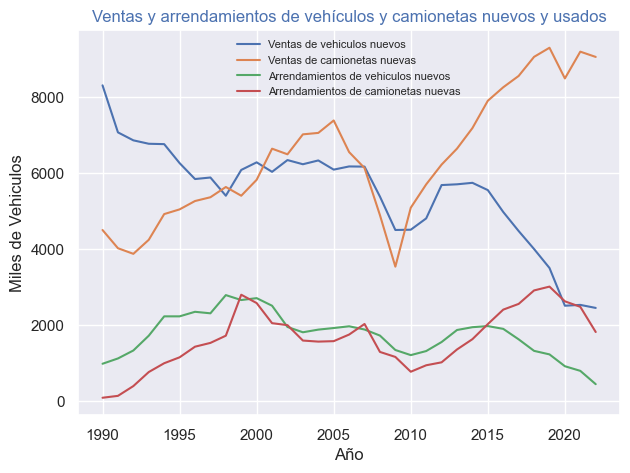

In [51]:
#Definimos los paramteros con los cuales queremos representar la informacion
x1 = df_bts.columns
y1 = df_bts.iloc[5].astype('int64')

x2 = df_bts.columns
y2 = df_bts.iloc[6].astype('int64')

x3 = df_bts.columns
y3 = df_bts.iloc[8].astype('int64')

x4 = df_bts.columns
y4 = df_bts.iloc[9].astype('int64')

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(x1, y1, label="Ventas de vehiculos nuevos")
ax.plot(x2, y2, label="Ventas de camionetas nuevas")
ax.plot(x3, y3, label="Arrendamientos de vehiculos nuevos")
ax.plot(x4, y4, label="Arrendamientos de camionetas nuevas")

ax.legend(prop = {'size': 8}, loc='upper center', frameon=False)

plt.xlabel('Año')
plt.ylabel('Miles de Vehiculos')
plt.title('Ventas y arrendamientos de vehículos y camionetas nuevos y usados', color='C0')

plt.show()

#### Conclusion: entender este grafico nos ayudara en la toma de decisiones, no solo en la predicción de precios, sino también en la evaluación del mercado  que es objeto de estudio a futuro. Siendo una clara señal que nuestro cliente deberá incorporar las camionetas si quiere tener una participación en el mercado automotor, ya que a través de los años la cuota de los automóviles ha ido decreciendo constantemente.

**Nota del autor:**
Todas las conclusiones obtenidas son exclusivas del dataframe analizado, por lo cual incurrimos en un error al querer extrapolarlas a otros ambitos o paises.


##### Preguntas:

Cuales son los 3 autos mas baratos?
subaru / chevrolet impala / maxda rx3	

Cuales con los 3 autos con mas potencia?
porsche cayenne / jaguar xk / porsche boxter

Cuales son los autos que menos combustible consumen en autopista (promedio) segun su pais?
Los autos japoneses son los que en promedio rinden mayor cantidad de millas por galon

Cuales son los autos con mayor cilindrada (promedio) segun su pais?
Los autos ingleses son los que poseen mayor cilindrada en promedio

Cual es la marca de autos que menos combustible consume en autopista (promedio)?
Chevrolet es la marca que en promedio rinde mayor cantidad de millas por galon

Cual es la marca de autos con mayor cilindrada (promedio)?
Jaguar es la marca que en promedio tiene mayor cilindrada

Cual es la marca con mayor cantidad de modelos?
Toyota posee 32 modelos

Cual es el pais que tiene mayor presencia de modelos?
Japon posee un total de 109 modelos

##### Insights:

Observamos que las marcas japonesas son las que tienen en promedio el menor consumo, como asi tambien el menor precio. Le siguen las marcas norteamericanas.

Por el contrario si preferimos los autos con mayor cilindrada deberemos buscar entre los europeos. Siendo que en estos casos el consumo en ciudad aumenta considerablemente y la cantidad de modelos se reduce dado su alto precio.

Los autos japoneses son los que en promedio tienen menor potencia (91,82).

Asimismo las marcas japonesas son las que mayor cantidad de modelos presentan, 109 en total.

Las compañias japonesas son las mas numerosas, con 7 en total.

Dentro de los autos europeos, son los alemanes quienes tienen mayor presencia con 32 modelos.

Las marcas norteamericanas son las que presentan mayor disparidad de precios, ubicandose en el ranking de los mas caros y los mas baratos.

El 85% de los automoviles se encuentran por debajo de los USD 18.500

Las siguientes variables tienen poca correlacion con el precio del automovil: "doornumber", "carheight", "stroke", "compressionratio", 'peakrpm', "boreratio".

El 90% de los automoviles mas baratos son los hatcbsch

**Conclusión:**

**Los datos muestran claramente algunos aspectos importantes del precio de los automóviles. En otras palabras, observamos los siguientes puntos:**

**La traccion trasera tiene un precio medio más alto que la delantera;
Los tipos de automovil convertible y hardtop tienen un precio medio más alto que el resto;
Mayor cantidad de cilindros representan en promedio un precio mas alto;
Los tipos de motor ohcv y dohcv tienen un precio medio más alto que el resto**

**Evitar las caracteristicas descritas en el punto anterior incidira notablemente en la reduccion del precio del automovil** 

<center><h1 style="color:DarkOrchid;">Modelo de Regresion Lineal</h1></center>


<ul style="list-style-type: square;">
    <li><h4 style="color:MediumPurple;">Encoding</h4></li>
    <li><h4 style="color:MediumPurple;">Ingeniería de atributos</h4></li>
    <li><h4 style="color:MediumPurple;">Entrenamiento de un modelo de Machine Learning Supervisado (Regresión)</h4></li>
    </ul>

In [52]:
autos = pd.merge(autos, df_company, how='left', on='CompanyName')

autos.info()

###Previo al armado de nuestro modelo###

#De nuestro analisis de variables numericas, vamos a excluir aquellas que no muestran una
#tendencia significativa sobre el precio del automovil. De la tabla "var_num_corr" descartamos
#aquellos casos que tengan un coeficiente "Correlacion / Precio" menor a 0,5:

#carheight, stroke, compressionratio, peakrpm, car_ID


#De nuestro analisis de variables categoricas, vamos a excluir aquellas que no muestran una
#tendencia significativa sobre el precio del automovil:

#doornumber, CarName (la reemplazamos por CarCompany)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [53]:
# Seleccionando features y target:

#target
y = autos["price"]

#features (excluimos las variables antes detalladas)
X = autos.drop(columns=["carheight", "stroke", "compressionratio", "peakrpm", "car_ID",
                        "doornumber", "CarName", "price"])

# Haciendo split en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1412)
#stratify=y se utiliza en clasificacion (mantiene la proporcion del dataset)

# Reseteando índices
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [54]:
#Pre procesamiento de datos:

#Realizamos encoding de variables categoricas.

#Listamos las variables categoricas
cat_features = X_train.select_dtypes(exclude="number")

cat_features = cat_features.columns.tolist()

cat_features

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CompanyName',
 'CompanyCountry']

In [55]:
#Analizamos las variables categoricas y como se componen
for column in cat_features:
    print(X_train[column].value_counts())

gas       147
diesel     17
Name: fueltype, dtype: int64
std      134
turbo     30
Name: aspiration, dtype: int64
sedan          78
hatchback      52
wagon          22
hardtop         6
convertible     6
Name: carbody, dtype: int64
fwd    91
rwd    66
4wd     7
Name: drivewheel, dtype: int64
front    162
rear       2
Name: enginelocation, dtype: int64
ohc      116
ohcv      12
l         11
ohcf      11
dohc      10
rotor      3
dohcv      1
Name: enginetype, dtype: int64
four      126
six        20
five        8
eight       5
two         3
twelve      1
three       1
Name: cylindernumber, dtype: int64
mpfi    81
2bbl    47
idi     17
1bbl     8
spdi     7
4bbl     2
spfi     1
mfi      1
Name: fuelsystem, dtype: int64
toyota        21
mazda         15
nissan        14
volkswagen    12
mitsubishi    10
volvo         10
peugeot       10
honda          9
subaru         9
dodge          7
buick          7
saab           6
bmw            6
plymouth       5
audi           5
porsche        4


In [56]:
#Cantidad de categorias por variable. Esto nos permitira saber la cantidad de columnas que se
#agregaran al dataset objeto de nuestro estudio
X_train[cat_features].nunique()

fueltype           2
aspiration         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
CompanyName       22
CompanyCountry     7
dtype: int64

In [57]:
#Utilizamos One Hot Encoding (porque en las variables del dataset no hay sentido de orden)
ohe = OneHotEncoder(sparse_output=False)
#Aplicamos OHE sobre todas las variables categoricas en un solo paso
#ohe.fit(X_train[cat_features])
X_train_cat = ohe.fit_transform(X_train[cat_features]) # Notar que se usa train
X_train_cat = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names_out())

#Verificamos
X_train_cat

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,CompanyCountry_france,CompanyCountry_germany,CompanyCountry_italy,CompanyCountry_japan,CompanyCountry_sweden,CompanyCountry_uk,CompanyCountry_usa
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
160,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
161,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
#Normalizamos las variables numericas dado que aplicaremos KNN (funciona en base a distancias)

#Listamos las variables numericas
num_features = X_train.select_dtypes(include="number")

num_features = num_features.columns.tolist()

num_features

['wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'citympg',
 'highwaympg']

In [59]:
#Utilizamos StandardScaler para normalizar las variables numericas
ss = StandardScaler()
#Aplicamos SS sobre todas las variables numericas en un solo paso
X_train_num = ss.fit_transform(X_train[num_features]) #Fit/Transform en un solo paso 
X_train_num = pd.DataFrame(data=X_train_num, columns=ss.get_feature_names_out())

#Verificamos
X_train_num

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,-0.892913,-2.081983,-0.954629,-1.225713,-0.874575,-1.583613,-0.757540,0.793770,0.527468
1,0.858260,1.122990,0.528466,0.854763,0.268947,1.581838,0.206911,-0.133866,-0.347791
2,-2.065868,-2.528036,-1.000976,-1.691234,-0.874575,-1.583613,-1.214386,3.731287,3.444995
3,-0.430339,-0.975111,-0.954629,-1.122264,-0.874575,-1.583613,-0.757540,0.793770,0.527468
4,0.213961,0.652156,0.389425,-0.062868,-0.477843,-0.564847,-0.452977,0.020740,0.089838
...,...,...,...,...,...,...,...,...,...
159,-0.892913,-1.478986,-1.047323,-1.204640,-0.921250,-1.365306,-0.960583,0.948377,1.110973
160,0.544371,0.032638,0.204039,-0.348311,-0.174460,-0.128233,-0.351455,0.329952,0.235715
161,-0.347736,-0.140827,-0.305775,-0.585861,-0.501180,0.999686,-0.605258,0.484558,0.235715
162,-0.892913,-1.478986,-1.047323,-1.378971,-0.921250,-1.365306,-0.960583,1.876013,1.548602


In [60]:
#Volvemos a armar el DataSet X_train ya preparado (concatenamos columnas)
X_train_prep = pd.concat([X_train_cat, X_train_num], axis=1)

X_train_prep

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,CompanyCountry_usa,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.892913,-2.081983,-0.954629,-1.225713,-0.874575,-1.583613,-0.757540,0.793770,0.527468
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.858260,1.122990,0.528466,0.854763,0.268947,1.581838,0.206911,-0.133866,-0.347791
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-2.065868,-2.528036,-1.000976,-1.691234,-0.874575,-1.583613,-1.214386,3.731287,3.444995
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.430339,-0.975111,-0.954629,-1.122264,-0.874575,-1.583613,-0.757540,0.793770,0.527468
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.213961,0.652156,0.389425,-0.062868,-0.477843,-0.564847,-0.452977,0.020740,0.089838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-0.892913,-1.478986,-1.047323,-1.204640,-0.921250,-1.365306,-0.960583,0.948377,1.110973
160,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.544371,0.032638,0.204039,-0.348311,-0.174460,-0.128233,-0.351455,0.329952,0.235715
161,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.347736,-0.140827,-0.305775,-0.585861,-0.501180,0.999686,-0.605258,0.484558,0.235715
162,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-0.892913,-1.478986,-1.047323,-1.378971,-0.921250,-1.365306,-0.960583,1.876013,1.548602


In [61]:
#las transformaciones realizadas en Xtrain se replican a X_test (One Hot Encoder).
#Aplicamos solo "transform", ya que debe utilizar los datos de train para realizar los calculos en 
#test (media y desviacion standard de Xtrain)
X_test_cat = ohe.transform(X_test[cat_features])
X_test_cat = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names_out())

X_test_cat

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,CompanyCountry_france,CompanyCountry_germany,CompanyCountry_italy,CompanyCountry_japan,CompanyCountry_sweden,CompanyCountry_uk,CompanyCountry_usa
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
#las transformaciones realizadas en Xtrain se replican a X_test (StandardScaler).
#Aplicamos solo "transform", ya que debe utilizar los datos de train para realizar los calculos en 
#test (media y desviacion standard de Xtrain)
X_test_num = ss.transform(X_test[num_features])
X_test_num = pd.DataFrame(X_test_num, columns=ss.get_feature_names_out())

X_test_num

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,-1.289405,-0.372114,0.852893,1.040589,1.202435,0.308381,2.389618,-1.216109,-1.077172
1,-0.347736,-0.140827,-0.305775,-0.269767,-0.501180,0.999686,-0.300695,0.020740,0.089838
2,-0.562503,-1.363343,-1.140016,-1.170157,-0.874575,-1.074230,-1.112864,1.566801,1.256849
3,-0.314695,-0.149087,-0.398469,-0.562872,-0.221134,-0.055464,-0.224554,0.329952,0.527468
4,-1.586774,-0.520798,-0.491162,0.306866,1.505818,1.436300,2.567280,-1.216109,-0.785420
5,-2.065868,-2.528036,-1.000976,-1.488167,-0.874575,-1.583613,-0.757540,0.948377,1.110973
6,-0.892913,-1.478986,-1.047323,-1.162494,-0.921250,-1.365306,-0.960583,0.948377,1.110973
7,0.726096,1.536002,0.852893,1.502278,1.855876,0.999686,1.932772,-1.370715,-1.223049
8,-0.892913,-2.081983,-0.954629,-1.453684,-1.177959,-1.583613,-1.163625,2.030619,1.694478
9,-0.892913,-1.429424,-1.140016,-0.911534,-0.501180,0.999686,-0.833681,0.175346,0.089838


In [63]:
#Volvemos a armar el DataSet X_test ya preparado (concatenamos columnas)
X_test_prep = pd.concat([X_test_cat, X_test_num], axis=1)

X_test_prep

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,CompanyCountry_usa,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.289405,-0.372114,0.852893,1.040589,1.202435,0.308381,2.389618,-1.216109,-1.077172
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.347736,-0.140827,-0.305775,-0.269767,-0.501180,0.999686,-0.300695,0.020740,0.089838
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.562503,-1.363343,-1.140016,-1.170157,-0.874575,-1.074230,-1.112864,1.566801,1.256849
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,-0.314695,-0.149087,-0.398469,-0.562872,-0.221134,-0.055464,-0.224554,0.329952,0.527468
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.586774,-0.520798,-0.491162,0.306866,1.505818,1.436300,2.567280,-1.216109,-0.785420
5,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-2.065868,-2.528036,-1.000976,-1.488167,-0.874575,-1.583613,-0.757540,0.948377,1.110973
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,-0.892913,-1.478986,-1.047323,-1.162494,-0.921250,-1.365306,-0.960583,0.948377,1.110973
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.726096,1.536002,0.852893,1.502278,1.855876,0.999686,1.932772,-1.370715,-1.223049
8,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.892913,-2.081983,-0.954629,-1.453684,-1.177959,-1.583613,-1.163625,2.030619,1.694478
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.892913,-1.429424,-1.140016,-0.911534,-0.501180,0.999686,-0.833681,0.175346,0.089838


### Elegimos un algoritmo de regresión para entrenar con los datos: KNN

KNN (K nearest neighbor): técnica de clasificación que se fundamenta en distancias para encontrar pertenencia a categorías determinadas sobre sus vecinos mas cercanos.

Dado que es un problema de regresion utilizaremos **KNeighborsRegressor**

In [64]:
#Elegimos un hiperparametro = 3
knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train_prep, y_train)

KNeighborsRegressor(n_neighbors=3)

In [65]:
#Listamos los precios predichos
preds_test = knn_model.predict(X_test_prep).astype('int64')
preds_test.tolist()

[16365,
 8478,
 6227,
 8042,
 28918,
 6984,
 6537,
 25603,
 6349,
 6728,
 8183,
 29341,
 12811,
 6654,
 6654,
 6537,
 8411,
 10137,
 17473,
 14165,
 9065,
 6010,
 7532,
 10797,
 18103,
 32853,
 13420,
 7149,
 7749,
 8231,
 7994,
 16301,
 8042,
 9925,
 11130,
 11846,
 5826,
 6960,
 5906,
 9747,
 9593]

In [66]:
#Listamos los precios actuales
y_test.tolist()

[19699,
 10198,
 5348,
 9549,
 34028,
 6855,
 7609,
 41315,
 5399,
 7053,
 7775,
 25552,
 13645,
 6488,
 6338,
 7609,
 10295,
 8921,
 17859,
 17450,
 7689,
 6377,
 8249,
 8948,
 22625,
 36880,
 14489,
 6849,
 7738,
 8358,
 7898,
 12440,
 8499,
 9538,
 9988,
 10698,
 6795,
 8916,
 6295,
 9298,
 10345]

In [67]:
#Creamos un DF que nos permita visualizar rapidamente las diferencias entre los valores actuales y
#lo predicho
df_review = pd.DataFrame({'Actual': y_test, 'Predicted': preds_test})
df_review['Dif'] = df_review.Actual - df_review.Predicted
df_review['Error_porc'] = ((df_review.Actual - df_review.Predicted) / df_review.Actual) *100
df_review

,Actual,Predicted,Dif,Error_porc
0,19699,16365,3334,16.924717
1,10198,8478,1720,16.866052
2,5348,6227,-879,-16.436051
3,9549,8042,1507,15.781757
4,34028,28918,5110,15.017045
5,6855,6984,-129,-1.881838
6,7609,6537,1072,14.088579
7,41315,25603,15712,38.029771
8,5399,6349,-950,-17.595851
9,7053,6728,325,4.607968


### Error cuadrático medio (RMSE):


Finalmente queremos estimar el rendimiento y evaluar el ajuste del modelo de regresión.

Para ello recurrimos al metodo RMSE, que indica el ajuste absoluto del modelo a los datos. Mas precisamente, cuán cerca están los puntos de datos observados de los valores predichos del modelo.

In [68]:
verdadero = y_test.tolist()
predicho = preds_test.tolist()

print('RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(verdadero, predicho, squared=False))))

RMSE: 55.613


### Conclusion:

*El RMSE es de USD 55,61. Por lo tanto el modelo tiene la complejidad suficiente para encontrar una frontera que parece ser la apropiada en base al dataset analizado.*

### R^2 (Coeficiente de determinacion):

El coeficiente de determinación cuantifica el porcentaje de variabilidad que puede explicar X de Y, por lo cual determina la calidad del modelo para replicar los resultados.

In [69]:
print('R^2 score: {0:.3f}'.format(knn_model.score(X_test_prep, y_test)))

R^2 score: 0.866


### Conclusion:

Resulta un R^2 = 87%. Siendo un coeficiente que por su cercania a 1 nos ayudara a predecir
de mejor manera los valores.

<center><h1 style="color:DarkOrchid;">Modelo de Regresion Lineal <font color="DarkBlue"> (utilizando Pipeline)</font></h1></center>


<ul style="list-style-type: square;">
    <li><h4 style="color:MediumPurple;">Encoding</h4></li>
    <li><h4 style="color:MediumPurple;">Ingeniería de atributos</h4></li>
    <li><h4 style="color:MediumPurple;">Entrenamiento de un modelo de Machine Learning Supervisado (Regresión)</h4></li>
    </ul>

In [70]:
#Realizaremos una segunda ronda de Feature Engineering con el fin de ampliar el número de variables

# Seleccionando features y target:

#target
y_2 = autos["price"]

#features (excluimos solo las siguiemtes variables)
X_2 = autos.drop(columns=["car_ID", "CarName", "price"])

# Haciendo split en train y test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=1412)
#stratify=y se utiliza en clasificacion (mantiene la proporcion del dataset)

# Reseteando índices
X_train_2.reset_index(drop=True, inplace=True)
X_test_2.reset_index(drop=True, inplace=True)
y_train_2.reset_index(drop=True, inplace=True)
y_test_2.reset_index(drop=True, inplace=True)

In [71]:
#Listamos las variables numericas
num_features_2 = X_train_2.select_dtypes(include="number")

num_features_2 = num_features_2.columns

num_features_2

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [72]:
#Listamos las variables categoricas
cat_features_2 = X_train_2.select_dtypes(exclude="number")

cat_features_2 = cat_features_2.columns

cat_features_2

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'CompanyCountry'],
      dtype='object')

In [73]:
#Detallamos los objetos a aplicar sobre las variables categoricas
cat_pipeline = Pipeline(
    steps=[
        ("one_hot_enc", OneHotEncoder())
    ]
)

#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline = Pipeline(
    steps=[
        ("stan_sca", StandardScaler())
    ]
)

#Concatenamos los resultados de los diferentes pipelines
prep_pipeline = ColumnTransformer(
    transformers=[
        ("num_features_2", num_pipeline, num_features_2),
        ("cat_features_2", cat_pipeline, cat_features_2)
    ]
)

In [74]:
#Visualizamos Xtrain ya transformado (este paso se puede omitir)
X_train_prep_2 = prep_pipeline.fit_transform(X_train_2)
X_train_prep_2 = pd.DataFrame(X_train_prep_2, columns=prep_pipeline.get_feature_names_out())
X_train_prep_2

,num_features_2__wheelbase,num_features_2__carlength,num_features_2__carwidth,num_features_2__carheight,num_features_2__curbweight,num_features_2__enginesize,num_features_2__boreratio,num_features_2__stroke,num_features_2__compressionratio,num_features_2__horsepower,...,cat_features_2__CompanyName_toyota,cat_features_2__CompanyName_volkswagen,cat_features_2__CompanyName_volvo,cat_features_2__CompanyCountry_france,cat_features_2__CompanyCountry_germany,cat_features_2__CompanyCountry_italy,cat_features_2__CompanyCountry_japan,cat_features_2__CompanyCountry_sweden,cat_features_2__CompanyCountry_uk,cat_features_2__CompanyCountry_usa
0,-0.892913,-2.081983,-0.954629,-0.514242,-1.225713,-0.874575,-1.583613,0.466573,-0.251219,-0.757540,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.858260,1.122990,0.528466,1.478258,0.854763,0.268947,1.581838,-0.335794,-0.177304,0.206911,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-2.065868,-2.528036,-1.000976,-1.246180,-1.691234,-0.874575,-1.583613,0.466573,-0.152666,-1.214386,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.430339,-0.975111,-0.954629,0.258360,-1.122264,-0.874575,-1.583613,0.466573,-0.251219,-0.757540,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.213961,0.652156,0.389425,0.502340,-0.062868,-0.477843,-0.564847,0.435713,-0.300495,-0.452977,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,-0.892913,-1.478986,-1.047323,-1.327507,-1.204640,-0.921250,-1.365306,-0.088911,-0.201943,-0.960583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
160,0.544371,0.032638,0.204039,0.421014,-0.348311,-0.174460,-0.128233,0.867757,-0.374410,-0.351455,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
161,-0.347736,-0.140827,-0.305775,-0.351588,-0.585861,-0.501180,0.999686,-1.909668,-0.300495,-0.605258,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162,-0.892913,-1.478986,-1.047323,-1.246180,-1.378971,-0.921250,-1.365306,-0.088911,-0.199479,-0.960583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
#Visualizamos Xtest ya transformado (este paso se puede omitir)
X_test_prep_2 = prep_pipeline.transform(X_test_2)
X_test_prep_2 = pd.DataFrame(X_test_prep_2, columns=prep_pipeline.get_feature_names_out())
X_test_prep_2

,num_features_2__wheelbase,num_features_2__carlength,num_features_2__carwidth,num_features_2__carheight,num_features_2__curbweight,num_features_2__enginesize,num_features_2__boreratio,num_features_2__stroke,num_features_2__compressionratio,num_features_2__horsepower,...,cat_features_2__CompanyName_toyota,cat_features_2__CompanyName_volkswagen,cat_features_2__CompanyName_volvo,cat_features_2__CompanyCountry_france,cat_features_2__CompanyCountry_germany,cat_features_2__CompanyCountry_italy,cat_features_2__CompanyCountry_japan,cat_features_2__CompanyCountry_sweden,cat_features_2__CompanyCountry_uk,cat_features_2__CompanyCountry_usa
0,-1.289405,-0.372114,0.852893,-1.693476,1.040589,1.202435,0.308381,0.034530,-0.596153,2.389618,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.347736,-0.140827,-0.305775,-0.351588,-0.269767,-0.501180,0.999686,-1.909668,-0.300495,-0.300695,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.562503,-1.363343,-1.140016,0.258360,-1.170157,-0.874575,-1.074230,-0.706117,-0.300495,-1.112864,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.314695,-0.149087,-0.398469,0.339687,-0.562872,-0.221134,-0.055464,0.651735,-0.423686,-0.224554,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.586774,-0.520798,-0.491162,-0.920874,0.306866,1.505818,1.436300,-1.107300,-0.177304,2.567280,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,-2.065868,-2.528036,-1.000976,-1.246180,-1.488167,-0.874575,-1.583613,0.466573,-0.251219,-0.757540,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,-0.892913,-1.478986,-1.047323,-1.327507,-1.162494,-0.921250,-1.365306,-0.088911,-0.201943,-0.960583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.726096,1.536002,0.852893,-0.066946,1.502278,1.855876,0.999686,0.404853,-0.546877,1.932772,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,-0.892913,-2.081983,-0.954629,-0.514242,-1.453684,-1.177959,-1.583613,-0.582676,-0.029476,-1.163625,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,-0.892913,-1.429424,-1.140016,-0.066946,-0.911534,-0.501180,0.999686,-1.909668,-0.374410,-0.833681,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [76]:
#Utilizamos el mismo hiperparametro (n = 3) que se uso en el modelo anterior
pipe_knn = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline),
        ("modelo", KNeighborsRegressor(n_neighbors=3))
    ]
)

#Pipeline entrena y aplica el preprocesamiento sobre X_train_2 (por lo cual no es necesario
#trabajar con X_train_prep_2)
pipe_knn.fit(X_train_2, y_train_2)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num_features_2',
                                                  Pipeline(steps=[('stan_sca',
                                                                   StandardScaler())]),
                                                  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat_features_2',
                                                  Pipeline(steps=[('one_hot_enc',
                                                                   OneHotEncoder())]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'CompanyCountry'],
      dtype='object'))])),
                ('modelo', KNeighborsRegressor(n_neighbors=3))])

In [77]:
preds_test_knn = pipe_knn.predict(X_test_2)

In [78]:
#Creamos un DF que nos permita visualizar rapidamente las diferencias entre los valores actuales y
#lo predicho
df_review_2 = pd.DataFrame({'Actual': y_test_2, 'Predicted': preds_test_knn.astype('int64')})
df_review_2['Dif'] = df_review_2.Actual - df_review_2.Predicted
df_review_2['Error_porc'] = ((df_review_2.Actual - df_review_2.Predicted) / df_review_2.Actual) *100
df_review_2

,Actual,Predicted,Dif,Error_porc
0,19699,17198,2501,12.696076
1,10198,8478,1720,16.866052
2,5348,6162,-814,-15.220643
3,9549,8897,652,6.827940
4,34028,30524,3504,10.297402
5,6855,6615,240,3.501094
6,7609,6537,1072,14.088579
7,41315,20816,20499,49.616362
8,5399,6349,-950,-17.595851
9,7053,6728,325,4.607968


### Error cuadrático medio (RMSE):

In [79]:
verdadero_2 = y_test_2.tolist()
predicho_2 = preds_test_knn.tolist()

print('RMSE: {0:.3f}'.format(np.sqrt(mean_squared_error(verdadero_2, predicho_2, squared=False))))

RMSE: 63.315


### R^2 (Coeficiente de determinacion):

In [80]:
print('R^2 score: {0:.3f}'.format(pipe_knn.score(X_test_2, y_test_2)))

R^2 score: 0.775


### Conclusion:

Resulta un R^2 = 77% y un RMSE = 63,31. Siendo coeficientes menores a los obtenidos en el modelo anterior. Por lo cual observamos que incluir mas variables en el analisis no incremento el porcentaje de acierto de la prediccion, sino que por el contrario lo redujo de manera significativa.

<center><h1 style="color:DarkOrchid;">Ingeniería de atributos y selección de variables</h1></center>


<ul style="list-style-type: square;">
    <li><h4 style="color:MediumPurple;">Ingeniería de atributos</h4></li>
    <li><h4 style="color:MediumPurple;">PCA</h4></li>
    <li><h4 style="color:MediumPurple;">Entrenamiento con diferentes modelos de Machine Learning Supervisado (KNN y Regresión)</h4></li>
    </ul>

**PCA (analisis de componentes principales)**: Los métodos de reducción de dimensionalidad o análisis de componentes principales consisten en resumir y visualizar la información más importante contenida en un conjunto de datos a través de un número más pequeño de variables que expliquen de manera colectiva la mayor parte de la variabilidad de dicho conjunto.

**KNN (vecinos mas cercanos)**: a grandes rasgos es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y valora el punto de interés basado en la mayoría de datos que le rodean.

**Regresión lineal múltiple**: permite generar un modelo lineal en el que el valor de la variable dependiente o respuesta (Y) se determina a partir de un conjunto de variables independientes (X1, X2, X3, ...)

In [81]:
#Realizaremos una tercera ronda de Feature Engineering. En esta oportunidad aplicamos PCA con 2 columnas

# Seleccionando features y target:

#target
y_3 = autos["price"]

#features (excluimos solo las siguiemtes variables)
X_3 = autos.drop(columns=["car_ID", "CarName", "price"])

# Haciendo split en train y test
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20, random_state=1412)
#stratify=y se utiliza en clasificacion (mantiene la proporcion del dataset)

# Reseteando índices
X_train_3.reset_index(drop=True, inplace=True)
X_test_3.reset_index(drop=True, inplace=True)
y_train_3.reset_index(drop=True, inplace=True)
y_test_3.reset_index(drop=True, inplace=True)


#Listamos las variables numericas
num_features_3 = X_train_3.select_dtypes(include="number")
num_features_3 = num_features_3.columns

#Listamos las variables categoricas
cat_features_3 = X_train_3.select_dtypes(exclude="number")
cat_features_3 = cat_features_3.columns


#Detallamos los objetos a aplicar sobre las variables categoricas
cat_pipeline_3 = Pipeline(
    steps=[
        ("one_hot_enc", OneHotEncoder())
    ]
)

#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline_3 = Pipeline(
    steps=[
        ("stan_sca", StandardScaler()),
        ('reduce_dim', PCA(n_components=2))
    ]
)

#Concatenamos los resultados de los diferentes pipelines
prep_pipeline_3 = ColumnTransformer(
    transformers=[
        ("num_features_3", num_pipeline_3, num_features_3),
        ("cat_features_3", cat_pipeline_3, cat_features_3)
    ]
)

#Utilizamos el mismo hiperparametro (n = 3) que se uso en el modelo anterior
pipe_knn_3 = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline_3),
        ("modelo", KNeighborsRegressor(n_neighbors=3))
    ]
)


#Pipeline entrena y aplica el preprocesamiento sobre X_train_2 (por lo cual no es necesario
#trabajar con X_train_prep_2)
pipe_knn_3.fit(X_train_3, y_train_3)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num_features_3',
                                                  Pipeline(steps=[('stan_sca',
                                                                   StandardScaler()),
                                                                  ('reduce_dim',
                                                                   PCA(n_components=2))]),
                                                  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat_features_3',
                                                  Pipeline(steps=[('one_hot_enc',
                                                                   OneHotEncoder())]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'CompanyCountry'],
      dtype='object'))])),
                ('modelo', KNeighborsRegressor(n_neighbors=3))])

In [82]:
preds_test_knn_3 = pipe_knn_3.predict(X_test_3)

#Creamos un DF que nos permita visualizar rapidamente las diferencias entre los valores actuales y
#lo predicho
df_review_3 = pd.DataFrame({'Actual': y_test_3, 'Predicted': preds_test_knn_3.astype('int64')})
df_review_3['Dif'] = df_review_3.Actual - df_review_3.Predicted
df_review_3['Error_porc'] = ((df_review_3.Actual - df_review_3.Predicted) / df_review_3.Actual) *100
#df_review_3

In [83]:
verdadero_3 = y_test_3.tolist()
predicho_3 = preds_test_knn_3.tolist()


print('Mean Squared Error: {0:.3f}'.format(mean_squared_error(verdadero_3, predicho_3, squared=False)))
print('Root Mean Squared Error: {0:.3f}'.format(np.sqrt(mean_squared_error(verdadero_3, predicho_3, squared=False))))
print('R^2 score: {0:.3f}'.format(pipe_knn_3.score(X_test_3, y_test_3)))
print('Mean Absolute Error: {0:.3f}'.format(metrics.mean_absolute_error(verdadero_3, predicho_3)))
print('Mean Absolute Percentage Error: {0:.3f}'.format(mean_absolute_percentage_error(verdadero_3, predicho_3)))

Mean Squared Error: 3260.306
Root Mean Squared Error: 57.099
R^2 score: 0.851
Mean Absolute Error: 1916.154
Mean Absolute Percentage Error: 0.147


In [84]:
#Realizaremos una cuarta ronda de Feature Engineering. En esta oportunidad aplicamos PCA con 3 
#columnas

# Seleccionando features y target:

#target
y_4 = autos["price"]

#features (excluimos solo las siguiemtes variables)
X_4 = autos.drop(columns=["car_ID", "CarName", "price"])

# Haciendo split en train y test
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.20, random_state=1412)
#stratify=y se utiliza en clasificacion (mantiene la proporcion del dataset)

# Reseteando índices
X_train_4.reset_index(drop=True, inplace=True)
X_test_4.reset_index(drop=True, inplace=True)
y_train_4.reset_index(drop=True, inplace=True)
y_test_4.reset_index(drop=True, inplace=True)


#Listamos las variables numericas
num_features_4 = X_train_4.select_dtypes(include="number")
num_features_4 = num_features_4.columns

#Listamos las variables categoricas
cat_features_4 = X_train_4.select_dtypes(exclude="number")
cat_features_4 = cat_features_4.columns


#Detallamos los objetos a aplicar sobre las variables categoricas
cat_pipeline_4 = Pipeline(
    steps=[
        ("one_hot_enc", OneHotEncoder())
    ]
)

#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline_4 = Pipeline(
    steps=[
        ("stan_sca", StandardScaler()),
        ('reduce_dim', PCA(n_components=3))
    ]
)

#Concatenamos los resultados de los diferentes pipelines
prep_pipeline_4 = ColumnTransformer(
    transformers=[
        ("num_features_4", num_pipeline_4, num_features_4),
        ("cat_features_4", cat_pipeline_4, cat_features_4)
    ]
)

#Utilizamos el mismo hiperparametro (n = 3) que se uso en el modelo anterior
pipe_knn_4 = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline_4),
        ("modelo", KNeighborsRegressor(n_neighbors=3))
    ]
)


#Pipeline entrena y aplica el preprocesamiento sobre X_train_2 (por lo cual no es necesario
#trabajar con X_train_prep_2)
pipe_knn_4.fit(X_train_4, y_train_4)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num_features_4',
                                                  Pipeline(steps=[('stan_sca',
                                                                   StandardScaler()),
                                                                  ('reduce_dim',
                                                                   PCA(n_components=3))]),
                                                  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat_features_4',
                                                  Pipeline(steps=[('one_hot_enc',
                                                                   OneHotEncoder())]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'CompanyCountry'],
      dtype='object'))])),
                ('modelo', KNeighborsRegressor(n_neighbors=3))])

In [85]:
preds_test_knn_4 = pipe_knn_4.predict(X_test_4)

#Creamos un DF que nos permita visualizar rapidamente las diferencias entre los valores actuales y
#lo predicho
df_review_4 = pd.DataFrame({'Actual': y_test_4, 'Predicted': preds_test_knn_4.astype('int64')})
df_review_4['Dif'] = df_review_4.Actual - df_review_4.Predicted
df_review_4['Error_porc'] = ((df_review_4.Actual - df_review_4.Predicted) / df_review_4.Actual) *100
#df_review_4


verdadero_4 = y_test_4.tolist()
predicho_4 = preds_test_knn_4.tolist()

print('Mean Squared Error: {0:.3f}'.format(mean_squared_error(verdadero_4, predicho_4, squared=False)))
print('Root Mean Squared Error: {0:.3f}'.format(np.sqrt(mean_squared_error(verdadero_4, predicho_4, squared=False))))
print('R^2 score: {0:.3f}'.format(pipe_knn_4.score(X_test_4, y_test_4)))
print('Mean Absolute Error: {0:.3f}'.format(metrics.mean_absolute_error(verdadero_4, predicho_4)))
print('Mean Absolute Percentage Error: {0:.3f}'.format(mean_absolute_percentage_error(verdadero_4, predicho_4)))

Mean Squared Error: 2869.641
Root Mean Squared Error: 53.569
R^2 score: 0.884
Mean Absolute Error: 1942.740
Mean Absolute Percentage Error: 0.147


In [86]:
#Eliminamos la marca Mercury que tiene una sola unidad, y que no es pasible de entrenar un modelo
autos_1 = autos.drop(autos.index[[75]])

#Hemos observado en los diferentes graficos, de variables categoricas, que los outliers aparecen en los rangos de precios
#superiores a los $30.000. Por lo tanto decidimos excluir solo el 2% de nuestro dataset (precios mayores a $36.000) a fin de
#validar si obtenemos mejores metricas
autos_1 = autos[autos['price'] < 36000]

In [87]:
#Realizaremos una quinta ronda de Feature Engineering. En esta oportunidad aplicamos PCA con 3 
#columnas

# Seleccionando features y target:

#target
y_5 = autos_1["price"]

#features (excluimos solo las siguiemtes variables)
X_5 = autos_1.drop(columns=["car_ID", "CarName", "price"])

# Haciendo split en train y test
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X_5, y_5, test_size=0.20, random_state=1412)
#stratify=y se utiliza en clasificacion (mantiene la proporcion del dataset)

# Reseteando índices
X_train_5.reset_index(drop=True, inplace=True)
X_test_5.reset_index(drop=True, inplace=True)
y_train_5.reset_index(drop=True, inplace=True)
y_test_5.reset_index(drop=True, inplace=True)


#Listamos las variables numericas
num_features_5 = X_train_5.select_dtypes(include="number")
num_features_5 = num_features_5.columns

#Listamos las variables categoricas
cat_features_5 = X_train_5.select_dtypes(exclude="number")
cat_features_5 = cat_features_5.columns


#Detallamos los objetos a aplicar sobre las variables categoricas
cat_pipeline_5 = Pipeline(
    steps=[
        ("one_hot_enc", OneHotEncoder())
    ]
)

#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline_5 = Pipeline(
    steps=[
        ("stan_sca", StandardScaler()),
        ('reduce_dim', PCA(n_components=3))
    ]
)

#Concatenamos los resultados de los diferentes pipelines
prep_pipeline_5 = ColumnTransformer(
    transformers=[
        ("num_features_5", num_pipeline_5, num_features_5),
        ("cat_features_5", cat_pipeline_5, cat_features_5)
    ]
)

#Utilizamos el mismo hiperparametro (n = 3) que se uso en el modelo anterior
pipe_knn_5 = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline_5),
        ("modelo", KNeighborsRegressor(n_neighbors=3))
    ]
)


#Pipeline entrena y aplica el preprocesamiento sobre X_train_5
pipe_knn_5.fit(X_train_5, y_train_5)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num_features_5',
                                                  Pipeline(steps=[('stan_sca',
                                                                   StandardScaler()),
                                                                  ('reduce_dim',
                                                                   PCA(n_components=3))]),
                                                  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat_features_5',
                                                  Pipeline(steps=[('one_hot_enc',
                                                                   OneHotEncoder())]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'CompanyCountry'],
      dtype='object'))])),
                ('modelo', KNeighborsRegressor(n_neighbors=3))])

In [88]:
preds_test_knn_5 = pipe_knn_5.predict(X_test_5)

#Creamos un DF que nos permita visualizar rapidamente las diferencias entre los valores actuales y
#lo predicho
df_review_5 = pd.DataFrame({'Actual': y_test_5, 'Predicted': preds_test_knn_5.astype('int64')})
df_review_5['Dif'] = df_review_5.Actual - df_review_5.Predicted
df_review_5['Error_porc'] = ((df_review_5.Actual - df_review_5.Predicted) / df_review_5.Actual) *100
df_review_5


verdadero_5 = y_test_5.tolist()
predicho_5 = preds_test_knn_5.tolist()


r2_knn = pipe_knn_5.score(X_test_5, y_test_5)

print('Mean Squared Error: {0:.3f}'.format(mean_squared_error(verdadero_5, predicho_5, squared=False)))
print('Root Mean Squared Error: {0:.3f}'.format(np.sqrt(mean_squared_error(verdadero_5, predicho_5, squared=False))))
print('R^2 score: {0:.3f}'.format(pipe_knn_5.score(X_test_5, y_test_5)))
print('Mean Absolute Error: {0:.3f}'.format(metrics.mean_absolute_error(verdadero_5, predicho_5)))
print('Mean Absolute Percentage Error: {0:.3f}'.format(mean_absolute_percentage_error(verdadero_5, predicho_5)))

Mean Squared Error: 2093.682
Root Mean Squared Error: 45.757
R^2 score: 0.884
Mean Absolute Error: 1489.167
Mean Absolute Percentage Error: 0.126


Conclusion: si bien el R^2 no presenta modificaciones con respecto al modelo anterior, si vemos que se redujo el RMSE como asi tambien MAPE. Por lo tanto haber quitado outliers mejoro nuestro modelo y obtuvimos asi nuestras mejores metricas con KNN y PCA (con 3 columnas). 

In [89]:
#Una vez obtuvimos nuestro mejor modelo con KNN, graficamos los valores reales vs predichos
fig = px.scatter(df_review_5, x="Actual", y="Predicted", trendline="ols")
fig.update_xaxes(title_text='Valor real',
                title_font=dict(size=16, family='Arial', color='SteelBlue'),
                ticks="outside", tickwidth=1, tickcolor='crimson', ticklen=10)                
fig.update_yaxes(title_text='Valor predicho',
                title_font=dict(size=16, family='Arial', color='SteelBlue'),
                ticks="outside", tickwidth=1, tickcolor='crimson', ticklen=10)

fig.update_layout(title_text="Valor real vs Valor Predicho", title_x=0.5)

fig.show()

In [90]:
#Realizaremos una sexta ronda de Feature Engineering. En esta oportunidad aplicamos PCA con 3 
#columnas y el modelo a utilizar es regresion lineal

# Seleccionando features y target:

#target
y_6 = autos_1["price"]

#features (excluimos solo las siguiemtes variables)
X_6 = autos_1.drop(columns=["car_ID", "CarName", "price"])


# Haciendo split en train y test
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6, y_6, test_size=0.20, random_state=1412)
#stratify=y se utiliza en clasificacion (mantiene la proporcion del dataset)

# Reseteando índices
X_train_6.reset_index(drop=True, inplace=True)
X_test_6.reset_index(drop=True, inplace=True)
y_train_6.reset_index(drop=True, inplace=True)
y_test_6.reset_index(drop=True, inplace=True)


#Listamos las variables numericas
num_features_6 = X_train_6.select_dtypes(include="number")
num_features_6 = num_features_6.columns

#Listamos las variables categoricas
cat_features_6 = X_train_6.select_dtypes(exclude="number")
cat_features_6 = cat_features_6.columns


#Detallamos los objetos a aplicar sobre las variables categoricas
cat_pipeline_6 = Pipeline(
    steps=[
        ("one_hot_enc", OneHotEncoder())
    ]
)

#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline_6 = Pipeline(
    steps=[
        ("stan_sca", StandardScaler()),
        ('reduce_dim', PCA(n_components=3))
    ]
)

#Concatenamos los resultados de los diferentes pipelines
prep_pipeline_6 = ColumnTransformer(
    transformers=[
        ("num_features_6", num_pipeline_6, num_features_6),
        ("cat_features_6", cat_pipeline_6, cat_features_6)
    ]
)


pipe_lr_6 = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline_6),
        ("modelo", LinearRegression())
    ]
)


#Pipeline entrena y aplica el preprocesamiento sobre X_train_6
pipe_lr_6.fit(X_train_6, y_train_6)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num_features_6',
                                                  Pipeline(steps=[('stan_sca',
                                                                   StandardScaler()),
                                                                  ('reduce_dim',
                                                                   PCA(n_components=3))]),
                                                  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')),
                                                 ('cat_features_6',
                                                  Pipeline(steps=[('one_hot_enc',
                                                                   OneHotEncoder())]),
                                                  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'CompanyCountry'],
      dtype='object'))])),
                ('modelo', LinearRegression())])

In [91]:
preds_test_lr_6 = pipe_lr_6.predict(X_test_6)


#Creamos un DF que nos permita visualizar rapidamente las diferencias entre los valores actuales y
#lo predicho
df_review_6 = pd.DataFrame({'Actual': y_test_6, 'Predicted': preds_test_lr_6.astype('int64')})
df_review_6['Dif'] = df_review_6.Actual - df_review_6.Predicted
df_review_6['Error_porc'] = ((df_review_6.Actual - df_review_6.Predicted) / df_review_6.Actual) *100
#df_review_6


verdadero_6 = y_test_6.tolist()
predicho_6 = preds_test_lr_6.tolist()


r2_lr = pipe_lr_6.score(X_test_6, y_test_6)


print('Mean Squared Error: {0:.3f}'.format(mean_squared_error(verdadero_6, predicho_6, squared=False)))
print('Root Mean Squared Error: {0:.3f}'.format(np.sqrt(mean_squared_error(verdadero_6, predicho_6, squared=False))))
print('R^2 score: {0:.3f}'.format(pipe_lr_6.score(X_test_6, y_test_6)))
print('Mean Absolute Error: {0:.3f}'.format(metrics.mean_absolute_error(verdadero_6, predicho_6)))
print('Mean Absolute Percentage Error: {0:.3f}'.format(mean_absolute_percentage_error(verdadero_6, predicho_6)))

Mean Squared Error: 2037.667
Root Mean Squared Error: 45.141
R^2 score: 0.890
Mean Absolute Error: 1633.958
Mean Absolute Percentage Error: 0.142


Conclusion: observamos que las metricas obtenidas con el modelo de Regresion Lineal fueron levemente mejores a las que se obtuvieron con el modelo KNN

<center><h1 style="color:DarkOrchid;">CrossValidation y mejora de modelos de ML</h1></center>


<ul style="list-style-type: square;">
    <li><h4 style="color:MediumPurple;">Ingeniería de atributos</h4></li>
    <li><h4 style="color:MediumPurple;">Comparamos las metricas de un mismo modelo con y sin CrossValidation</h4></li>
    </ul>

La validación cruzada es un método estadístico utilizado para evaluar el rendimiento de los modelos de aprendizaje automático. Es una técnica que se utiliza para validar la capacidad del modelo para generalizar a nuevos datos, y es especialmente útil cuando el modelo tiene pocos puntos de datos o cuando los datos están desequilibrados.

**Validación cruzada K-fold**: Este método implica dividir los datos en k folds, donde k-1 folds se utilizan para el entrenamiento y un fold se utiliza para la prueba. El proceso se repite k veces, con un fold diferente utilizado como el conjunto de prueba cada vez. El rendimiento promedio en todas las k iteraciones se utiliza para evaluar el modelo.

In [92]:
#Realizamos nuestro primer modelo (sin validacion cruzada)
# Seleccionando features y target:

#target
y_8 = autos["price"]

#features (excluimos solo las siguiemtes variables)
X_8 = autos.drop(columns=["car_ID", "CarName", "price"])


# Haciendo split en train y test
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.20, random_state=1412)


# Reseteando índices
X_train_8.reset_index(drop=True, inplace=True)
X_test_8.reset_index(drop=True, inplace=True)
y_train_8.reset_index(drop=True, inplace=True)
y_test_8.reset_index(drop=True, inplace=True)


#Solo listamos las variables numericas
num_features_8 = X_train_8.select_dtypes(include="number")
num_features_8 = num_features_8.columns


#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline_8 = Pipeline(
    steps=[
        ("stan_sca", StandardScaler())
    ]
)

#Concatenamos los resultados de los diferentes pipelines
prep_pipeline_8 = ColumnTransformer(
    transformers=[
        ("num_features_8", num_pipeline_8, num_features_8)
    ]
)


pipe_lr_8 = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline_8),
        ("modelo", LinearRegression())
    ]
)


#Pipeline entrena y aplica el preprocesamiento sobre X_train_6
pipe_lr_8.fit(X_train_8, y_train_8)

Pipeline(steps=[('preprocesamiento',
                 ColumnTransformer(transformers=[('num_features_8',
                                                  Pipeline(steps=[('stan_sca',
                                                                   StandardScaler())]),
                                                  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object'))])),
                ('modelo', LinearRegression())])

In [93]:
preds_test_lr_8 = pipe_lr_8.predict(X_test_8)


#Creamos un DF que nos permita visualizar rapidamente las diferencias entre los valores actuales y
#lo predicho
df_review_8 = pd.DataFrame({'Actual': y_test_8, 'Predicted': preds_test_lr_8.astype('int64')})
df_review_8['Dif'] = df_review_8.Actual - df_review_8.Predicted
df_review_8['Error_porc'] = ((df_review_8.Actual - df_review_8.Predicted) / df_review_8.Actual) *100
#df_review_6


verdadero_8 = y_test_8.tolist()
predicho_8 = preds_test_lr_8.tolist()


print('R^2 score: {0:.3f}'.format(pipe_lr_8.score(X_test_8, y_test_8)))

R^2 score: 0.827


In [94]:
#Realizamos nuestro segundo modelo con validacion cruzada 
#Como realizamos un solo modelo utlizamos: "X" e "y"
#En caso de comparar entre modelos deberiamos utilizar: X_train, X_test, y_train, y_test (train_test_split)

# Seleccionando features y target:

#target
y_7 = autos["price"]

#features (excluimos solo las siguiemtes variables)
X_7 = autos.drop(columns=["car_ID", "CarName", "price"])


#Listamos las variables numericas
num_features_7 = X_7.select_dtypes(include="number")
num_features_7 = num_features_7.columns


#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline_7 = Pipeline(
    steps=[
        ("stan_sca", StandardScaler())
    ]
)

#Concatenamos los resultados de los diferentes pipelines
prep_pipeline_7 = ColumnTransformer(
    transformers=[
        ("num_features_7", num_pipeline_7, num_features_7)
    ]
)
    


pipe_lr_7 = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline_7),
        ("modelo", LinearRegression())
    ]
)

In [95]:
#Realizamos validacion cruzada para 10 folds
#Siendo el score elegido R^2
cv_scores = cross_val_score(
                estimator = pipe_lr_7,
                X         = X_7,
                y         = y_7,
                scoring   = 'r2',
                cv        = 10
            )

#Imprimimos cada una de las iteraciones con los resultados correspondientes
print(f"Métricas validación cruzada R^2: {cv_scores.round(3)}")
print(f"Média métricas de validación cruzada R^2: {cv_scores.mean().round(3)}")

Métricas validación cruzada R^2: [ 0.611 -0.289  0.747  0.824 -0.86   0.526  0.692 -0.053 -0.5    0.693]
Média métricas de validación cruzada R^2: 0.239


In [96]:
#Realizamos validacion cruzada para 5 folds
#Siendo el score elegido R^2
cv_scores_2 = cross_val_score(
                estimator = pipe_lr_7,
                X         = X_7,
                y         = y_7,
                scoring   = 'r2',
                cv        = 5
            )

print(f"Métricas validación cruzada R^2: {cv_scores_2.round(3)}")
print(f"Média métricas de validación cruzada R^2: {cv_scores_2.mean().round(3)}")

Métricas validación cruzada R^2: [0.749 0.865 0.182 0.769 0.431]
Média métricas de validación cruzada R^2: 0.599


Conclusion: observamos que las metricas obtenidas con el R^2 disminuyeron considerablente cuando se utlizo CrossValidation. A medida que aumentaron los folds decrecieron los valores obtenidos. Esto muestra que las diferentes iteraciones arrojaron resultados mas representativos.
La ventaja es que nos da una validación más robusta, dado que al final el modelo terminará siendo entrenado y validado con la totalidad de los datos. Así que con la validación cruzada tendremos una medida bastante fiable de la capacidad de generalización del modelo.

<center><h1 style="color:DarkOrchid;">Entrenamiento y optimización de modelos de Machine Learning</h1></center>

<ul style="list-style-type: square;">
    <li><h4 style="color:MediumPurple;">Etapas de un problema de machine learning:</h4></li>
    </ul>

Definir el problema: ¿Qué se pretende predecir? ¿De qué datos se dispone? o ¿Qué datos es necesario conseguir?

Explorar y entender los datos que se van a emplear.

Métrica de éxito: definir una forma apropiada de cuantificar los resultados obtenidos.

<ul style="list-style-type: square;">
    <li><h4 style="color:MediumPurple;">A fin de conseguir nuestro objetivo, deberemos:</h4></li>
    </ul>

Preparar la estrategia para evaluar el modelo: separar las observaciones en un conjunto de entrenamiento, un conjunto de validación (o validación cruzada) y un conjunto de test. Es muy importante asegurar que ninguna información de test participa en el proceso de entrenamiento del modelo.

Preprocesar los datos: aplicar las transformaciones necesarias para que los datos puedan ser interpretados por el algoritmo de machine learning.

Gradualmente, mejorar el modelo incorporando-creando nuevas variables u optimizando los hiperparámetros (datos definidos por el usuario).

Evaluar la capacidad del modelo final con el conjunto de test

Entrenar el modelo final con todos los datos disponibles.


**Nota del autor**

Durante el proceso de análisis hemos realizado diferentes transformaciones sobre el dataset, sin embargo hemos visto mejoras poco significativas en las métricas resultantes.


Asimismo, no es el propósito de esta presentación detallarlas una a una. Sino centrarnos en aquellas que presentaron  los mejores valores


Las detallamos a continuación:

**Random Forest:** un modelo Random Forest está formado por un conjunto de árboles de decisión individuales, cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

In [97]:
# Seleccionando features y target:

#target
y_9 = autos["price"]

#features (excluimos solo las siguiemtes variables)
X_9 = autos.drop(columns=["car_ID", "CarName", "price"])


# Haciendo split en train y test
X_train_9, X_test_9, y_train_9, y_test_9 = train_test_split(X_9, y_9, test_size=0.20, random_state=1412)


# Reseteando índices
X_train_9.reset_index(drop=True, inplace=True)
X_test_9.reset_index(drop=True, inplace=True)
y_train_9.reset_index(drop=True, inplace=True)
y_test_9.reset_index(drop=True, inplace=True)


#Solo listamos las variables numericas
num_features_9 = X_train_9.select_dtypes(include="number")
num_features_9 = num_features_9.columns


#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline_9 = Pipeline(
    steps=[
        ("stan_sca", StandardScaler())
    ]
)


#Listamos las variables categoricas
cat_features_9 = X_train_9.select_dtypes(exclude="number")
cat_features_9 = cat_features_9.columns


#Detallamos los objetos a aplicar sobre las variables categoricas
cat_pipeline_9 = Pipeline(
    steps=[
        ("one_hot_enc", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)

#Concatenamos los resultados de los diferentes pipelines
prep_pipeline_9 = ColumnTransformer(
    transformers=[
        ("num_features_9", num_pipeline_9, num_features_9),
        ("cat_features_9", cat_pipeline_9, cat_features_9)
    ]
)


pipe_rf_9 = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline_9),
        ("modelo", RandomForestRegressor(random_state = 123))
    ]
)



**GridSearchCV:** hace una búsqueda exhaustiva evaluando todas las combinaciones de parámetros. Esta estrategia tiene el inconveniente de que se puede invertir mucho tiempo en regiones de poco interés antes de evaluar otras combinaciones.

In [98]:
#Nombre del objeto seguido de __ (son 2 "_")
param_grid = {'modelo__n_estimators' : [10, 20, 30, 40],
              'modelo__max_depth' : [3, 5, 7, 10],
              'modelo__min_samples_split' : [3, 4, 5, 6]
             }

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

grid_rf = GridSearchCV(
            estimator  = pipe_rf_9,
            param_grid = param_grid,
            scoring    = 'r2',
            n_jobs     = -1,
            cv         = folds,
            verbose    = 1,
            return_train_score = True
       )

grid_rf.fit(X_train_9, y_train_9)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num_features_9',
                                                                         Pipeline(steps=[('stan_sca',
                                                                                          StandardScaler())]),
                                                                         Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm'...
                                                                         Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'CompanyCountry'],
      dtype='object'))])),
                                       ('modelo',
                                        RandomForestRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'modelo__max_depth': [3, 5, 7, 10],
                         'modelo__min_samples_split': [3, 4, 5, 6],
                         'modelo__n_estimators': [10, 20, 30, 40]},
             return_train_score=True, scoring='r2', verbose=1)

In [99]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_rf.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_modelo__max_depth,param_modelo__min_samples_split,param_modelo__n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
35,7,3,40,0.886340,0.033747,0.980147,0.002883
39,7,4,40,0.885141,0.035247,0.978591,0.003159
59,10,5,40,0.884399,0.034974,0.977450,0.004486
51,10,3,40,0.883635,0.037602,0.982706,0.002894


In [100]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("-" * 40)
print(grid_rf.best_params_)
print("")
print(grid_rf.scoring, grid_rf.best_score_)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'modelo__max_depth': 7, 'modelo__min_samples_split': 3, 'modelo__n_estimators': 40}

r2 0.8863397690358819


In [101]:
# Los mejores hiperparametros obtenidos los evaluamos sobre X_test
# ==============================================================================
predicciones = grid_rf.predict(X = X_test_9)


y_true  = y_test_9
y_pred  = predicciones


r2_rf = grid_rf.score(X_test_9, y_test_9)
print('R^2 score: {0:.3f}'.format(r2_rf))


print('Mean Squared Error: {0:.3f}'.format(mean_squared_error(y_true, y_pred, squared=False)))
print('Root Mean Squared Error: {0:.3f}'.format(np.sqrt(mean_squared_error(y_true, y_pred, squared=False))))
print('Mean Absolute Error: {0:.3f}'.format(metrics.mean_absolute_error(y_true, y_pred)))
print('Mean Absolute Percentage Error: {0:.3f}'.format(mean_absolute_percentage_error(y_true, y_pred)))

R^2 score: 0.941
Mean Squared Error: 2054.675
Root Mean Squared Error: 45.329
Mean Absolute Error: 1360.275
Mean Absolute Percentage Error: 0.105





**Gradient Boosting Trees:** un modelo Gradient Boosting Trees está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores.

In [102]:
# Seleccionando features y target:

#target
y_10 = autos["price"]

#features (excluimos solo las siguiemtes variables)
X_10 = autos.drop(columns=["car_ID", "CarName", "price"])


# Haciendo split en train y test
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=0.20, random_state=1412)


# Reseteando índices
X_train_10.reset_index(drop=True, inplace=True)
X_test_10.reset_index(drop=True, inplace=True)
y_train_10.reset_index(drop=True, inplace=True)
y_test_10.reset_index(drop=True, inplace=True)


#Solo listamos las variables numericas
num_features_10 = X_train_10.select_dtypes(include="number")
num_features_10 = num_features_10.columns


#Detallamos los objetos a aplicar sobre las variables numericas
num_pipeline_10 = Pipeline(
    steps=[
        ("stan_sca", StandardScaler())
    ]
)


#Listamos las variables categoricas
cat_features_10 = X_train_10.select_dtypes(exclude="number")
cat_features_10 = cat_features_10.columns


#Detallamos los objetos a aplicar sobre las variables categoricas
cat_pipeline_10 = Pipeline(
    steps=[
        ("one_hot_enc", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]
)


prep_pipeline_10 = ColumnTransformer(
    transformers=[
        ("num_features_10", num_pipeline_10, num_features_10),
        ("cat_features_10", cat_pipeline_10, cat_features_10)
    ]
)


pipe_gbr_10 = Pipeline(
    steps=[
        ("preprocesamiento", prep_pipeline_10),
        ("modelo_gbr", GradientBoostingRegressor(random_state=123))
    ]
)


In [103]:
#Nombre del objeto seguido de __ (son 2 "_")
param_grid_gbr = {'modelo_gbr__max_depth' : [1, 2, 3, 4],
                  'modelo_gbr__learning_rate' : [0.01, 0.02, 0.1, 0.2],
                  'modelo_gbr__n_estimators' : [100, 200, 300, 400]
             }


grid_gbr = GridSearchCV(
            estimator  = pipe_gbr_10,
            param_grid = param_grid_gbr,
            scoring    = 'r2',
            n_jobs     = -1,
            cv         = folds,
            verbose    = 1,
            return_train_score = True
       )

grid_gbr.fit(X_train_10, y_train_10)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('num_features_10',
                                                                         Pipeline(steps=[('stan_sca',
                                                                                          StandardScaler())]),
                                                                         Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm...
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName', 'CompanyCountry'],
      dtype='object'))])),
                                       ('modelo_gbr',
                                        GradientBoostingRegressor(random_state=123))]),
             n_jobs=-1,
             param_grid={'modelo_gbr__learning_rate': [0.01, 0.02, 0.1, 0.2],
                         'modelo_gbr__max_depth': [1, 2, 3, 4],
                         'modelo_gbr__n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='r2', verbose=1)

In [104]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid_rf.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_modelo__max_depth,param_modelo__min_samples_split,param_modelo__n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
35,7,3,40,0.886340,0.033747,0.980147,0.002883
39,7,4,40,0.885141,0.035247,0.978591,0.003159
59,10,5,40,0.884399,0.034974,0.977450,0.004486
51,10,3,40,0.883635,0.037602,0.982706,0.002894


In [105]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("-" * 40)
print(grid_gbr.best_params_)
print("")
print(grid_gbr.scoring, grid_gbr.best_score_)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'modelo_gbr__learning_rate': 0.02, 'modelo_gbr__max_depth': 3, 'modelo_gbr__n_estimators': 300}

r2 0.9015631503778755


In [106]:
# Los mejores hiperparametros obtenidos los evaluamos sobre X_test
# ==============================================================================
predicciones_ = grid_gbr.predict(X = X_test_10)


y_true_  = y_test_10
y_pred_  = predicciones_


r2_gbr = grid_gbr.score(X_test_10, y_test_10)
print('R^2 score: {0:.3f}'.format(r2_gbr))


print('Mean Squared Error: {0:.3f}'.format(mean_squared_error(y_true_, y_pred_, squared=False)))
print('Root Mean Squared Error: {0:.3f}'.format(np.sqrt(mean_squared_error(y_true_, y_pred_, squared=False))))
print('Mean Absolute Error: {0:.3f}'.format(metrics.mean_absolute_error(y_true_, y_pred_)))
print('Mean Absolute Percentage Error: {0:.3f}'.format(mean_absolute_percentage_error(y_true_, y_pred_)))

R^2 score: 0.918
Mean Squared Error: 2416.634
Root Mean Squared Error: 49.159
Mean Absolute Error: 1533.161
Mean Absolute Percentage Error: 0.116


In [107]:
#Creamos un DF que nos permita visualizar rapidamente las diferencias entre los valores actuales y
#lo predicho
df_review_10 = pd.DataFrame({'Actual': y_test_10, 'Predicted': y_pred_.astype('int64')})
df_review_10['Dif'] = df_review_10.Actual - df_review_10.Predicted
df_review_10['Error_porc'] = ((df_review_10.Actual - df_review_10.Predicted) / df_review_10.Actual) *100
df_review_10

,Actual,Predicted,Dif,Error_porc
0,19699,16845,2854,14.488045
1,10198,9416,782,7.668170
2,5348,7102,-1754,-32.797307
3,9549,8948,601,6.293853
4,34028,32818,1210,3.555895
5,6855,6505,350,5.105762
6,7609,6553,1056,13.878302
7,41315,31259,10056,24.339828
8,5399,6715,-1316,-24.374884
9,7053,6752,301,4.267688


In [108]:
#Creamos un DataFrame a partir de las metricas obtenidas 
error_modelos = pd.DataFrame({
                        'Modelo': ['GradientBoostingRegressor', 'RandomForestRegressor', 'LinearRegression',
                                  'KNeighborsRegressor'],
                        'Rsquad': [r2_gbr, r2_rf, r2_lr, r2_knn]
                     })
error_modelos = error_modelos.sort_values('Rsquad', ascending=False)

error_modelos['Rsquad'] = error_modelos['Rsquad'].round(4)

error_modelos

,Modelo,Rsquad
1,RandomForestRegressor,0.9408
0,GradientBoostingRegressor,0.9181
2,LinearRegression,0.8898
3,KNeighborsRegressor,0.8836


In [109]:
fig = px.bar(error_modelos, y='Modelo', x= ('Rsquad'), text_auto='True', height=450)

fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)

fig.update_layout(xaxis_title="R^2", yaxis_title="Modelos")

fig.update_layout(title_text="Comparación de error de test modelos", title_x=0.5)

fig.show()

In [110]:
#Una vez obtuvimos nuestro mejor modelo (RandomForestRegressor), graficamos los valores reales vs predichos
fig = px.scatter(df_review_10, x="Actual", y="Predicted", trendline="ols")
fig.update_xaxes(title_text='Valor real',
                title_font=dict(size=16, family='Arial', color='SteelBlue'),
                ticks="outside", tickwidth=1, tickcolor='crimson', ticklen=10)                
fig.update_yaxes(title_text='Valor predicho',
                title_font=dict(size=16, family='Arial', color='SteelBlue'),
                ticks="outside", tickwidth=1, tickcolor='crimson', ticklen=10)

fig.update_layout(title_text="Valor real vs Valor Predicho (RandomForestRegressor)", title_x=0.5)

fig.show()

<center><h1 style="color:MediumPurple;">Conclusion Final</font></h1></center>

<ul style="list-style-type: square;">
    <li><h4 style="color:DarkOrchid;">La ciencia de datos es mucho más que conocer los últimos métodos y herramientas disponibles.</h4></li>
    </ul>

<ul style="list-style-type: square;">
    <li><h4 style="color:DarkOrchid;">Primero comprenda su problema. Evalúe sus datos de acuerdo con su objetivo.</h4></li>
    </ul>

<ul style="list-style-type: square;">
    <li><h4 style="color:DarkOrchid;">Visualizar datos es clave. Ayúdese con gráficos para comprender las métricas.</h4></li>
    </ul>

<ul style="list-style-type: square;">
    <li><h4 style="color:DarkOrchid;">Finalmente hay que entender que la ciencia de datos real requiere prueba y error. Debe validar constantemente la entrada y la salida.</h4></li>
    </ul>

**Tips:**

<ul style="list-style-type: square;">
    <li><h4 style="color:DarkBlue;">La validación cruzada nos dará métricas más robustas, pues al final el modelo terminará siendo entrenado y validado con la totalidad de los datos.</h4></li>
    </ul>
 
<ul style="list-style-type: square;">
    <li><h4 style="color:DarkBlue;">Los pipelines evitaran que se filtre información al conjunto de test.</h4></li>
    </ul>

<ul style="list-style-type: square;">
    <li><h4 style="color:DarkBlue;">Los modelos de ensembling, a través del tuneo de hiperparametros, permitirán obtener mejores métricas.</h4></li>
    </ul>
